In [1]:
 #Import necessary Libraries or install if not yet installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
os.chdir('..')
get_ipython().run_line_magic('matplotlib', 'inline')
import json
import glob

# Data Read

In [2]:
import pandas as pd

# Specify the full path to the CSV file
file_path = r'C:\Users\user\Downloads\Acute Respiratory Infection\ARI_banglasesh.csv'

# Read the CSV file
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(data.head())
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


C:\Users\user\AppData\Local\Temp\ipykernel_6588\1935089544.py:8: DtypeWarning: Columns (126,127,135,136,137,145,147,161,309,310,311,312,313,314,315,366,367,415,449,453,462,463,472,473,474,493,529,536,579,581,583,585,586,587,611,710,711,714,715,718,719,723,727,731,735,743,744,772,773,777,781,784,785,789,793,812,813,817,821,824,825,829,833,960,961,962,963,964,965,966,967,968,982,983,984,985,997,999,1040,1041,1048,1050,1065,1066,1069,1070,1073,1077,1098,1173,1174,1175,1176,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


File loaded successfully!


,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,s630t,s630u,s630v,s630w,s630y,breathing,blockage,blockage_cat,breathing_cat,ARI
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,1. yes,1. yes,0. no,0. no,0. no,0. no,NaN,NaN,no,no
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,0. no,NaN,NaN,no,no
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,0. no,0. no,0. no,0. no,0. no,0. no,NaN,NaN,no,no
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,0. no,0. no,0. no,0. no,0. no,0. no,NaN,NaN,no,no


In [3]:
# Print the dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (8759, 1232)


# EDA

Value Counts:
 ARI
no     7355
yes    1042
Name: count, dtype: int64

Proportions:
 ARI
no     0.875908
yes    0.124092
Name: proportion, dtype: float64


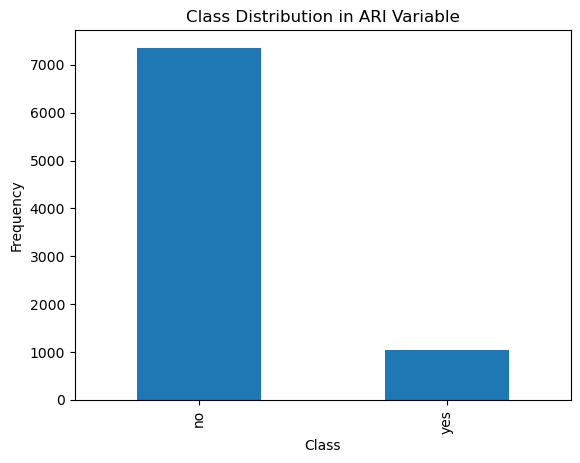

In [4]:
# Get value counts
target_counts = data['ARI'].value_counts()
print("Value Counts:\n", target_counts)

# Calculate proportions
target_proportions = data['ARI'].value_counts(normalize=True)
print("\nProportions:\n", target_proportions)

# Visualize the distribution
target_counts.plot(kind='bar')
plt.title('Class Distribution in ARI Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
unique_values = data['v113'].unique()

# Print unique values
print(unique_values)

['21. tube well or borehole' '97. not a dejure resident' '51. rainwater'
 '43. river/dam/lake/ponds/stream/canal/irrigation channel'
 '11. piped into dwelling' '14. public tap/standpipe'
 '13. piped to neighbor' '12. piped to yard/plot' '32. unprotected well'
 '31. protected well' '62. cart with small tank' '71. bottled water'
 '61. tanker truck']


In [6]:
# Check for missing values in the 'water' column and count them
missing_count = data.isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: caseid              0
hidxa               0
v000                0
v001                0
v002                0
                 ... 
breathing         361
blockage         7706
blockage_cat     7706
breathing_cat     361
ARI               362
Length: 1232, dtype: int64


In [7]:
unique_values = data['b8'].unique()

# Print unique values
print(unique_values)

[ 0. nan  2.  3.  4.  1.]


In [8]:
unique_values = data['v025'].unique()

# Print unique values
print(unique_values)

['2. rural' '1. urban']


In [9]:
import pandas as pd
v025_mapping = {
    '2. rural': 1,
    '1. urban': 0
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Type of place of residence'] = data['v025'].map(v025_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...   s630u  s630v  s630w  s630y  breathing  blockage blockage_cat  \
0  ...  1. yes  0. no  0. no  0. no      0. no       NaN          NaN   
1  ...     NaN    NaN    NaN    NaN      0. no       NaN          NaN   
2  ...   0. no  0. no  0. no  0. no      0. no       NaN          NaN   
3  ...     NaN    NaN    NaN    NaN        NaN       NaN          NaN   
4  ...   0. no  0. no  0. no  0. no      0. no       NaN          NaN   

  breathing_cat  ARI  Type of place of residence  
0            no   no                     

In [10]:
# Check for missing values in the 'water' column and count them
missing_count = data['Type of place of residence'].isnull().sum()

print("Number of missing values in the 'Type of place of residence' column:", missing_count)

Number of missing values in the 'Type of place of residence' column: 0


In [11]:
unique_values = data['v106'].unique()

# Print unique values
print(unique_values)

['3. higher' '1. primary' '2. secondary' '0. no education']


In [12]:
import pandas as pd

v106_mapping = {
    '0. no education': 0,
    '1. primary': 1,
    '2. secondary':2,
    '3. higher':3
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Highest eduction level'] = data['v106'].map(v106_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630v  s630w  s630y  breathing  blockage  blockage_cat breathing_cat  \
0  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   
1  ...    NaN    NaN    NaN      0. no       NaN           NaN            no   
2  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   
3  ...    NaN    NaN    NaN        NaN       NaN           NaN           NaN   
4  ...  0. no  0. no  0. no      0. no       NaN           NaN            no   

   ARI Type of place of residence  Highest eductio

In [13]:
# Check for missing values in the 'water' column and count them
missing_count = data['Highest eduction level'].isnull().sum()

print("Number of missing values in the 'Highest eduction level' column:", missing_count)


Number of missing values in the 'Highest eduction level' column: 0


In [14]:
unique_values = data['v119'].unique()

# Print unique values
print(unique_values)

['0. no' '7. not a dejure resident' '1. yes']


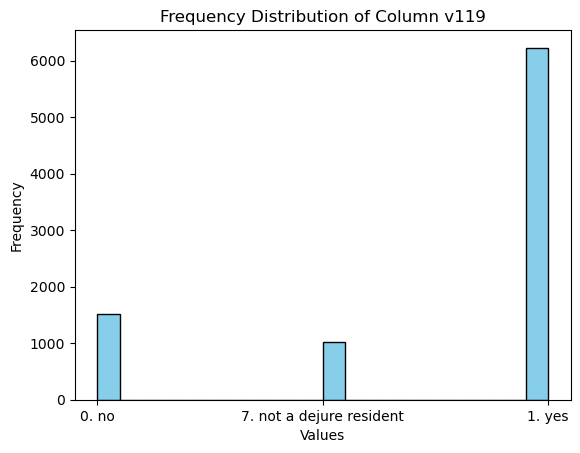

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the values in column 'v119'
plt.hist(data['v119'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Column v119')
plt.show()


In [16]:
import pandas as pd

v119_mapping = {
    '0. no': 0,
    '1. yes': 1,
    '7. not a dejure resident':2
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Household has electricity'] = data['v119'].map(v119_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630w  s630y  breathing  blockage  blockage_cat  breathing_cat  ARI  \
0  ...  0. no  0. no      0. no       NaN           NaN             no   no   
1  ...    NaN    NaN      0. no       NaN           NaN             no   no   
2  ...  0. no  0. no      0. no       NaN           NaN             no   no   
3  ...    NaN    NaN        NaN       NaN           NaN            NaN  NaN   
4  ...  0. no  0. no      0. no       NaN           NaN             no   no   

  Type of place of residence Highest eduction level  Hou

In [17]:
# Check for missing values in the 'water' column and count them
missing_count = data['Household has electricity'].isnull().sum()

print("Number of missing values in the 'Household has electricity' column:", missing_count)


Number of missing values in the 'Household has electricity' column: 0


In [18]:
unique_values = data['v190'].unique()

# Print unique values
print(unique_values)

['1. poorest' '2. poorer' '3. middle' '4. richer' '5. richest']


In [19]:
import pandas as pd

v190_mapping = {
    '1. poorest': 1,
    '2. poorer': 2,
    '3. middle':3,
    '4. richer':4,
    '5. richest':5
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Wealth index combined'] = data['v190'].map(v190_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  s630y  breathing  blockage  blockage_cat  breathing_cat  ARI  \
0  ...  0. no      0. no       NaN           NaN             no   no   
1  ...    NaN      0. no       NaN           NaN             no   no   
2  ...  0. no      0. no       NaN           NaN             no   no   
3  ...    NaN        NaN       NaN           NaN            NaN  NaN   
4  ...  0. no      0. no       NaN           NaN             no   no   

  Type of place of residence Highest eduction level Household has electricity  \
0                

In [20]:
# Check for missing values in the 'water' column and count them
missing_count = data['Wealth index combined'].isnull().sum()

print("Number of missing values in the column:", missing_count)


Number of missing values in the column: 0


In [21]:
unique_values = data['v404'].unique()

# Print unique values
print(unique_values)

['1. yes' '0. no']


In [22]:
v404_mapping = {
   '0. no': 0,
   '1. yes': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Current breastfeeding'] = data['v404'].map(v404_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  breathing  blockage  blockage_cat  breathing_cat  ARI  \
0  ...      0. no       NaN           NaN             no   no   
1  ...      0. no       NaN           NaN             no   no   
2  ...      0. no       NaN           NaN             no   no   
3  ...        NaN       NaN           NaN            NaN  NaN   
4  ...      0. no       NaN           NaN             no   no   

   Type of place of residence Highest eduction level  \
0                           1                      3   
1                           

In [23]:
# Check for missing values in the 'water' column and count them
missing_count = data['Current breastfeeding'].isnull().sum()

print("Number of missing values in the  column:", missing_count)


Number of missing values in the  column: 0


In [24]:
unique_values = data['b4'].unique()

# Print unique values
print(unique_values)

['1. male' '2. female']


In [25]:
# Check for missing values in the 'water' column and count them
missing_count = data['b4'].isnull().sum()

print("Number of missing values in the column:", missing_count)


Number of missing values in the column: 0


In [26]:
# Perform one-hot encoding for column 'b4'
one_hot_encoded = pd.get_dummies(data['b4'])

# Rename the new columns
one_hot_encoded.columns = ['Sex of the child_Male', 'Sex of the child_Female']

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Drop the original 'b4' column
data.drop('b4', axis=1, inplace=True)

# Display the updated DataFrame
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  blockage_cat  breathing_cat  ARI  Type of place of residence  \
0  ...           NaN             no   no                           1   
1  ...           NaN             no   no                           1   
2  ...           NaN             no   no                           1   
3  ...           NaN            NaN  NaN                           1   
4  ...           NaN             no   no                           1   

   Highest eduction level  Household has electricity Wealth index combined  \
0                   

In [27]:
unique_values = data['b9'].unique()

# Print unique values
print(unique_values)

['0. respondent' nan '4. lives elsewhere']


In [28]:

b9_mapping = {
    '0. respondent': 0,
    '4. lives elsewhere': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Child lives with whom'] = data['b9'].map(b9_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  breathing_cat  ARI  Type of place of residence  \
0  ...             no   no                           1   
1  ...             no   no                           1   
2  ...             no   no                           1   
3  ...            NaN  NaN                           1   
4  ...             no   no                           1   

   Highest eduction level  Household has electricity  Wealth index combined  \
0                       3                          0                      1   
1                       

In [29]:
# Check for missing values in the 'water' column and count them
missing_count = data['Child lives with whom'].isnull().sum()

print("Number of missing values in the 'Child lives with whom ' column:", missing_count)


Number of missing values in the 'Child lives with whom ' column: 357


In [30]:
unique_values = data['v161'].unique()

# Print unique values
print(unique_values)

['8. wood' '97. not a dejure resident' '2. lpg' '10. agricultural crop'
 '11. animal dung' nan '9. straw/shrubs/grass' '96. other'
 '95. no food cooked in house' '3. natural gas' '1. electricity'
 '4. biogas' '7. charcoal' '5. kerosene']


In [31]:
# Create a dictionary to map the new values to the four categories
fuel_mapping = {
    '1. electricity': 1,
    '2. lpg': 4,
    '3. natural gas': 4,
    '4. biogas': 4,
    '5. kerosene': 4,
    '7. charcoal': 3,
    '8. wood': 2,
    '9. straw/shrubs/grass': 4,
    '10. agricultural crop': 4,
    '11. animal dung': 4,
    '95. no food cooked in house': 4,
    '96. other': 4,
    '97. not a dejure resident': 4
}
# Create a new column 'Fuel Category' with the mapped values
data['Type of cooking fuel'] = data['v161'].map(fuel_mapping)

# Print the DataFrame to verify the new column
print(data)

               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  ARI  Type of pla

In [32]:
# Check for missing values in the 'water' column and count them
missing_count = data['Type of cooking fuel'].isnull().sum()

print("Number of missing values in the 'Type of cooking fuel' column:", missing_count)


Number of missing values in the 'Type of cooking fuel' column: 6


In [33]:
# Get the frequency counts of the 'Type of cooking fuel' column
fuel_frequency = data['Type of cooking fuel'].value_counts()

# Print the frequency counts
print(fuel_frequency)

Type of cooking fuel
4.0    5004
2.0    3696
1.0      47
3.0       6
Name: count, dtype: int64


In [34]:
unique_values = data['v714'].unique()

# Print unique values
print(unique_values)

['0. no' '1. yes']


In [35]:
v714_mapping = {
   '0. no': 0,
   '1. yes': 1
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Occupation'] = data['v714'].map(v714_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Type of place of residence  Highest eduction level  \
0  ...                           1                       3   
1  ...                           1                       1   
2  ...                           1                       2   
3  ...                           1                       2   
4  ...                           1                       1   

   Household has electricity  Wealth index combined  Current breastfeeding  \
0                          0                      1                      1   
1 

In [36]:
# Check for missing values in the 'water' column and count them
missing_count = data['Occupation'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [37]:
unique_values = data['h43'].unique()

# Print unique values
print(unique_values)

['0. no' nan '1. yes' "8. don't know"]


In [38]:
h43_mapping = {
   '0. no': 0,
   '1. yes': 1,
    "8. don't know":0
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Drug'] = data['h43'].map(h43_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Highest eduction level  Household has electricity  \
0  ...                       3                          0   
1  ...                       1                          0   
2  ...                       2                          2   
3  ...                       2                          2   
4  ...                       1                          0   

   Wealth index combined  Current breastfeeding  Sex of the child_Male  \
0                      1                      1                   True   
1               

In [39]:
# Check for missing values in the 'water' column and count them
missing_count = data['Drug'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 361


In [40]:
unique_values = data['v218'].unique()

# Print unique values
print(unique_values)

[ 1  4  3  2  0  5  6  8  7 10  9]


In [41]:
# Define a function to categorize the values
def categorize_children(value):
    if value <= 3:
        return 0
    elif value <= 6:
        return 1
    else:
        return 2

# Apply the function to the column v218 and create a new column
data['Number of living children'] = data['v218'].apply(categorize_children)

# Display the first few rows of the DataFrame to verify the changes
data.head()

,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Household has electricity,Wealth index combined,Current breastfeeding,Sex of the child_Male,Sex of the child_Female,Child lives with whom,Type of cooking fuel,Occupation,Drug,Number of living children
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,0,1,1,True,False,0.0,2.0,0,0.0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,0,1,1,True,False,0.0,2.0,0,0.0,1
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,2,2,1,True,False,0.0,4.0,0,0.0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,2,2,1,False,True,NaN,4.0,0,NaN,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,0,1,1,True,False,0.0,2.0,0,1.0,0


In [42]:
# Check for missing values in the 'water' column and count them
missing_count = data['Number of living children'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [43]:
unique_values = data['h11'].unique()

# Print unique values
print(unique_values)

['0. no' nan '2. yes, last two weeks' "8. don't know"]


In [44]:
h11_mapping = {
   '0. no': 0,
   '2. yes, last two weeks': 1,
    "8. don't know":0
}

# Create a new column 'Typeof place of residence' with the mapped values
data['Had diarrhea'] = data['h11'].map(h11_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Wealth index combined  Current breastfeeding  Sex of the child_Male  \
0  ...                      1                      1                   True   
1  ...                      1                      1                   True   
2  ...                      2                      1                   True   
3  ...                      2                      1                  False   
4  ...                      1                      1                   True   

   Sex of the child_Female  Child lives with whom  Type 

In [45]:
# Check for missing values in the 'water' column and count them
missing_count = data['Had diarrhea'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 361


In [46]:
unique_values = data['m4'].unique()

# Print unique values
print(unique_values)

['95. still breastfeeding' '94. never breastfed' nan '18' '15' '27' '30'
 '4' '34' '24' '3' '2' '22' '29' '26' '23' '11' '12' '16' '0' '28' '14'
 '31' '5' '10' '25' '1' '17' '9' '21' '32' '20' '19' '6' '13' '8' '33' '7'
 '35']


In [47]:
m4_mapping = {
    '95. still breastfeeding': 0,
    '94. never breastfed': 1,
    # Map the rest of the values to 2
    '18': 2, '15': 2, '27': 2, '30': 2, '4': 2, '34': 2, '24': 2, '3': 2,
    '2': 2, '22': 2, '29': 2, '26': 2, '23': 2, '11': 2, '12': 2, '16': 2,
    '0': 2, '28': 2, '14': 2, '31': 2, '5': 2, '10': 2, '25': 2, '1': 2,
    '17': 2, '9': 2, '21': 2, '32': 2, '20': 2, '19': 2, '6': 2, '13': 2,
    '8': 2, '33': 2, '7': 2, '35': 2
}


# Create a new column 'Typeof place of residence' with the mapped values
data['Duration of breastfeeding'] = data['m4'].map(m4_mapping)

# Print the first few rows to verify the new column
print(data.head())


            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Current breastfeeding  Sex of the child_Male  Sex of the child_Female  \
0  ...                      1                   True                    False   
1  ...                      1                   True                    False   
2  ...                      1                   True                    False   
3  ...                      1                  False                     True   
4  ...                      1                   True                    False   

   Child lives with whom  Type of cooking fu

In [48]:
# Check for missing values in the 'water' column and count them
missing_count = data['Duration of breastfeeding'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 3766


In [49]:
unique_values = data['h34'].unique()

# Print unique values
print(unique_values)

['0. no' "8. don't know" nan '1. yes']


In [50]:
# Create a dictionary to map the values
h34_mapping = {
   '0. no': 0,
   '1. yes': 1,
   "8. don't know": 0
}

# Create a new column 'Vitamin A supplement' with the mapped values
data['Vitamin A supplement'] = data['h34'].map(h34_mapping)

# Print the first few rows to verify the new column
print(data.head())



            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Sex of the child_Male  Sex of the child_Female  Child lives with whom  \
0  ...                   True                    False                    0.0   
1  ...                   True                    False                    0.0   
2  ...                   True                    False                    0.0   
3  ...                  False                     True                    NaN   
4  ...                   True                    False                    0.0   

   Type of cooking fuel  Occupation  Drug Nu

In [51]:
# Check for missing values in the 'water' column and count them
missing_count = data['Vitamin A supplement'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 360


In [52]:
unique_values = data['b8'].unique()

# Print unique values
print(unique_values)

[ 0. nan  2.  3.  4.  1.]


In [53]:
# Copy the 'b8' column and rename it to 'Age of child'
data['Age of child'] = data['b8']

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data)


Updated DataFrame:
               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      .

In [54]:
# Check for missing values in the 'water' column and count them
missing_count = data['Age of child'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 357


In [55]:
unique_values = data['hw70'].unique()

# Print unique values
print(unique_values)

['-59' '12' '-53' nan '-208' '-291' '-48' '-21' '-108' '-111' '-138'
 '-227' '-137' '24' '-297' '-12' '18' '-177' '-145' '-182' '-240' '-114'
 '-207' '-205' '-140' '-22' '-17' '94' '-75' '-93' '-252' '-157' '-20'
 '-339' '-123' '-61' '-133' '-120' '10' '248' '-38' '-92' '-199' '-76'
 '-368' '102' '-465' '-412' '-45' '-30' '-116' '135' '-65' '-163' '-198'
 '-235' '-220' '-80' '-268' '-269' '-166' '-129' '89' '-312' '-376' '11'
 '-172' '-47' '-164' '-149' '60' '-229' '-203' '-130' '-169' '56' '475'
 '-134' '103' '-226' '-195' '-181' '-96' '-234' '-6' '-168' '-239' '-219'
 '-155' '70' '-87' '-91' '-99' '-259' '-31' '-33' '-366' '-280' '-196'
 '-212' '-3' '-144' '-206' '-238' '-148' '-288' '-11' '-223' '-29' '345'
 '-215' '315' '85' '-101' '418' '-73' '-322' '-82' '16' '-43' '-113'
 '-200' '-56' '-14' '-211' '-286' '-171' '-194' '90' '-298' '-209' '-228'
 '120' '-183' '-117' '-105' '-289' '-249' '2' '-271' '-23' '-88' '-186'
 '293' '-260' '-15' '-135' '-243' '-10' '-210' '-60' '52' '-187' 

In [56]:
unique_values = data['hw72'].unique()

# Print unique values
print(unique_values)

['-235' '-57' '-92' nan '-240' '-249' '-148' '-197' '35' '302' '-199'
 '-44' '20' '-130' '-77' '-18' '-38' '-47' '3' '168' '-182' '-116' '74'
 '-163' '4' '-151' '-224' '11' '-9' '15' '202' '-81' '-55' '-118' '-142'
 '-50' '-22' '-85' '-201' '111' '-141' '-307' '-172' '-132' '142' '-288'
 '234' '285' '-113' '-100' '-171' '-35' '-435' '-12' '-5' '17' '-32' '53'
 '-131' '307' '-108' '-15' '-99' '-115' '-20' '39' '-210' '-58' '9' '-146'
 '-106' '-170' '-84' '-66' '-63' '-64' '-408' '-192' '-60' '-97' '117'
 '-53' '-178' '-23' '25' '60' '-183' '-69' '-127' '-126' '-25' '-120'
 '-173' '-72' '-45' '-102' '-78' '-137' '225' '-221' '-134' '-152' '-52'
 '-98' '45' '197' '16' '63' '84' '112' '-343' '-280' '-122' '175' '-36'
 '30' '-241' '10' '-217' '-21' '-257' '-29' '-103' '-88' '-112' '-51' '98'
 '-191' '100' '-129' '107' '96' '9998. flagged cases' '-3' '36' '-43'
 '-109' '103' '-96' '-94' '-107' '-80' '-317' '-145' '33' '76' '-19' '-24'
 '-133' '-7' '-114' '72' '19' '-128' '-16' '177' '34' '-1

In [57]:
import pandas as pd

# Convert the values in columns hw70 and hw72 to numeric data types
data['hw70'] = pd.to_numeric(data['hw70'], errors='coerce')
data['hw72'] = pd.to_numeric(data['hw72'], errors='coerce')

# Check for flagged values and replace them with -999
data['hw70'] = data['hw70'].replace(9999, -999)
data['hw72'] = data['hw72'].replace(9999, -999)

# Convert the values in columns hw70 and hw72 by dividing by 100
data['hw70'] /= 100
data['hw72'] /= 100

# Define a function to categorize stunting
def categorize_stunting(height_age_std):
    # Check if height is flagged or out of plausible limits (EDHS guideline: -999)
    if height_age_std == -999:
        return -999  # Flagged or implausible value
    # If either moderately or severely stunted or severely stunted, consider abnormal (1), else normal (0)
    elif height_age_std < -3 or height_age_std < -2:
        return 1  # Abnormal (moderate or severe stunting or severe stunting)
    else:
        return 0  # Normal

# Apply the function to create new 'stunting' column
data['stunting'] = data['hw70'].apply(categorize_stunting)

# Display the first few rows of the DataFrame to verify the changes
data.head()


,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Child lives with whom,Type of cooking fuel,Occupation,Drug,Number of living children,Had diarrhea,Duration of breastfeeding,Vitamin A supplement,Age of child,stunting
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,0.0,2.0,0,0.0,0,0.0,0.0,0.0,0.0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,0.0,2.0,0,0.0,1,0.0,0.0,0.0,0.0,0
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,0.0,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,NaN,4.0,0,NaN,0,NaN,1.0,NaN,NaN,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,0.0,2.0,0,1.0,0,0.0,0.0,1.0,2.0,1


In [58]:
# Convert the values in column hw72 to numeric data type
data['hw72'] = pd.to_numeric(data['hw72'], errors='coerce')

# Check for flagged values and replace them with -999
data['hw72'] = data['hw72'].replace(9999, -999)

# Convert the values in column hw72 by dividing by 100
data['hw72'] /= 100

# Define a function to categorize wasting
def categorize_wasting(weight_height_std):
    # Check if weight-for-height is flagged or out of plausible limits (EDHS guideline: -999)
    if weight_height_std == -999:
        return -999  # Flagged or implausible value
    elif weight_height_std < -3:
        return 1  # Severe wasting
    elif weight_height_std < -2:
        return 2  # Moderate wasting
    else:
        return 0  # Normal

# Apply the function to create new 'wasting' column
data['wasting'] = data['hw72'].apply(categorize_wasting)

# Display the first few rows of the DataFrame to verify the changes
data.head()

,caseid,hidxa,v000,v001,v002,v003,v004,v005,v006,v007,...,Type of cooking fuel,Occupation,Drug,Number of living children,Had diarrhea,Duration of breastfeeding,Vitamin A supplement,Age of child,stunting,wasting
0,1 17 4,1,BD7,1,17,4,1,664194,11,2017,...,2.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
1,1 48 2,1,BD7,1,48,2,1,664194,11,2017,...,2.0,0,0.0,1,0.0,0.0,0.0,0.0,0,0
2,1 52 4,1,BD7,1,52,4,1,664194,11,2017,...,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
3,1 52 4,2,BD7,1,52,4,1,664194,11,2017,...,4.0,0,NaN,0,NaN,1.0,NaN,NaN,0,0
4,1 61 2,1,BD7,1,61,2,1,664194,11,2017,...,2.0,0,1.0,0,0.0,0.0,1.0,2.0,1,0


In [59]:
# Check unique values in columns v157, v158, and v159
unique_v157 = data['v157'].unique()
unique_v158 = data['v158'].unique()
unique_v159 = data['v159'].unique()

print("Unique values in column v157:", unique_v157)
print("Unique values in column v158:", unique_v158)
print("Unique values in column v159:", unique_v159)

Unique values in column v157: ['0. not at all' '1. less than once a week' '2. at least once a week']
Unique values in column v158: ['0. not at all' '2. at least once a week' '1. less than once a week']
Unique values in column v159: ['0. not at all' '1. less than once a week' '2. at least once a week']


In [60]:
# Define mapping dictionaries for each column
mapping_v157 = {'0. not at all': 0, '1. less than once a week': 1, '2. at least once a week': 1}
mapping_v158 = {'0. not at all': 0, '1. less than once a week': 1, '2. at least once a week': 1}
mapping_v159 = {'0. not at all': 0, '1. less than once a week': 1, '2. at least once a week': 1}

# Apply mapping to each column
data['v157'] =data['v157'].map(mapping_v157)
data['v158'] = data['v158'].map(mapping_v158)
data['v159'] = data['v159'].map(mapping_v159)

# Check the updated DataFrame
print(data)


               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  Type of cooking 

In [61]:
# Create 'Media' column
data['Media'] = (data['v157'] | data['v158'] | data['v159']).astype(int)

# Check the updated DataFrame
print(data)

               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  Occupation  Drug

In [62]:
# Check for missing values in the 'water' column and count them
missing_count = data['Media'].isnull().sum()

print("Number of missing values in the column:", missing_count)

Number of missing values in the column: 0


In [63]:
# Check frequency of values in 'Media' column
media_frequency = data['Media'].value_counts()

# Display the frequency
print(media_frequency)


Media
1    5601
0    3158
Name: count, dtype: int64


In [64]:
unique_values = data['m15'].unique()

# Print unique values
print(unique_values)

['33. private clinic' "11. respondent's home" nan
 '21. medical college hospital' '32. private hospital' '24. mcwc'
 '25. upazilla health complex' '41. ngo static clinic' '42. delivery hut'
 '27. uh & family welfare center' '23. district hospital'
 '31. private medical college hospital' '96. other' '28. community clinic'
 '36. other private medical sector' '26. other public sector'
 '22. specialized government hospital']


In [65]:
# Define mapping dictionary
mapping = {
    '11. respondent\'s home': 'Home',
    '33. private clinic': 'Hospital',
    '21. medical college hospital': 'Hospital',
    '32. private hospital': 'Hospital',
    '24. mcwc': 'Hospital',
    '25. upazilla health complex': 'Hospital',
    '41. ngo static clinic': 'Hospital',
    '42. delivery hut': 'Hospital',
    '27. uh & family welfare center': 'Hospital',
    '23. district hospital': 'Hospital',
    '31. private medical college hospital': 'Hospital',
    '28. community clinic': 'Hospital',
    '36. other private medical sector': 'Hospital',
    '26. other public sector': 'Hospital',
    '22. specialized government hospital': 'Hospital',
    '96. other': 'Hospital',
    pd.NA: pd.NA  # Keep NaN values as NaN
}

# Apply mapping
data['Place of delivery'] = data['m15'].map(mapping)

# Assign 0 and 1 values based on the mapped categories
data['Place of delivery'] = data['Place of delivery'].apply(lambda x: 1 if x == 'Home' else (2 if x == 'Hospital' else pd.NA))

# Check the updated DataFrame
print(data)

               caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0             1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1             1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2             1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3             1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4             1 61  2      1  BD7     1    61     2     1  664194    11  2017   
...               ...    ...  ...   ...   ...   ...   ...     ...   ...   ...   
8754        675 71  2      1  BD7   675    71     2   675  222146     2  2018   
8755        675 74  5      1  BD7   675    74     5   675  222146     2  2018   
8756        675 74  5      2  BD7   675    74     5   675  222146     2  2018   
8757        675 77  2      1  BD7   675    77     2   675  222146     2  2018   
8758        675 92  4      1  BD7   675    92     4   675  222146     2  2018   

      ...  Drug  Number of 

In [66]:
# Check frequency of values in 'Media' column
Placeofdelivery_frequency = data['Place of delivery'].value_counts()

# Display the frequency
print(Placeofdelivery_frequency)

Place of delivery
2    2668
1    2636
Name: count, dtype: int64


In [67]:
unique_values = data['m17'].unique()

# Print unique values
print(unique_values)

['1. yes' '0. no' nan]


In [68]:
# Create a dictionary to map the values
m17_mapping = {
   '0. no': 0,
   '1. yes': 1,
}


data['Delivery by c-section'] = data['m17'].map(m17_mapping)

# Print the first few rows to verify the new column
print(data.head())

            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Number of living children  Had diarrhea  Duration of breastfeeding  \
0  ...                          0           0.0                        0.0   
1  ...                          1           0.0                        0.0   
2  ...                          0           0.0                        0.0   
3  ...                          0           NaN                        1.0   
4  ...                          0           0.0                        0.0   

   Vitamin A supplement  Age of child  stunting wasting Media 

In [69]:
unique_values = data['v012'].unique()

# Print unique values
print(unique_values)

[18 35 21 31 22 23 40 29 37 24 25 27 28 39 38 33 30 26 19 17 32 20 36 41
 34 16 15 42 46 43 49 47 44 45 48]


In [70]:
# Define the bins and labels for categorization
bins = [0, 20, 34, float('inf')]
labels = [1, 2, 3]

# Categorize values in the 'v012' column and create the 'Mother's age' column
data['Mother\'s age'] = pd.cut(data['v012'], bins=bins, labels=labels, right=False)

# Convert the categories to integers
data['Mother\'s age'] = data['Mother\'s age'].astype(int)

# Check the updated DataFrame
print(data[['v012', 'Mother\'s age']].head())

   v012  Mother's age
0    18             1
1    35             3
2    21             2
3    21             2
4    31             2


In [71]:
# Check for missing values in the 'Mother's age' column
missing_mothers_age = data['Mother\'s age'].isnull().sum()

# Print the missing values in the 'Mother's age' column
print(f"Missing values in 'Mother's age' column: {missing_mothers_age}")


Missing values in 'Mother's age' column: 0


In [72]:
unique_values = data['v136'].unique()

# Print unique values
print(unique_values)

[ 6  8  5  3  4  7  9  2 10 12 15 14 13 11 23 18  1 19 16 17 22 20 30]


In [73]:
# Create the 'Household members' column based on the 'v136' column
data['Household members'] = data['v136'].apply(lambda x: 0 if x < 5 else 1)

# Check the updated DataFrame
print(data[['v136', 'Household members']].head())

   v136  Household members
0     6                  1
1     6                  1
2     6                  1
3     6                  1
4     8                  1


In [74]:
unique_values = data['bord'].unique()

# Print unique values
print(unique_values)

[ 1  4  2  3  5  7  6  8  9 10 11]


In [75]:
# Create a new column "Birth order" based on the values of the column "bord"
data = data.assign(**{'Birth order': data['bord']})

# Check the updated DataFrame
print(data.head())

            caseid  hidxa v000  v001  v002  v003  v004    v005  v006  v007  \
0          1 17  4      1  BD7     1    17     4     1  664194    11  2017   
1          1 48  2      1  BD7     1    48     2     1  664194    11  2017   
2          1 52  4      1  BD7     1    52     4     1  664194    11  2017   
3          1 52  4      2  BD7     1    52     4     1  664194    11  2017   
4          1 61  2      1  BD7     1    61     2     1  664194    11  2017   

   ...  Vitamin A supplement  Age of child  stunting  wasting  Media  \
0  ...                   0.0           0.0         0        0      0   
1  ...                   0.0           0.0         0        0      0   
2  ...                   0.0           0.0         0        0      0   
3  ...                   NaN           NaN         0        0      0   
4  ...                   1.0           2.0         1        0      0   

   Place of delivery Delivery by c-section Mother's age Household members  \
0                  2 

In [76]:
unique_values = data['v445'].unique()

# Print unique values
print(unique_values)

[2122. 1744. 1668. ... 3414. 2983. 3140.]


In [77]:
# Function to categorize BMI
def categorize_bmi(v445_value):
    bmi = v445_value / 100  # Convert the value back to its original form by dividing by 100
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi < 25:
        return 1  # Normal
    elif 25 <= bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

# Apply the categorization function to the 'v445' column
data['Mothers BMI'] = data['v445'].apply(categorize_bmi)

# Check the updated DataFrame
print(data[['v445', 'Mothers BMI']].head())

     v445  Mothers BMI
0  2122.0            1
1  1744.0            0
2  1668.0            0
3  1668.0            0
4  2019.0            1


In [78]:
print(list(data.columns))

['caseid', 'hidxa', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v166', 'v167', 'v168', 'v169a', 'v169b', 'v170', 'v171a', 'v171b', 'v190', 'v191', 'v190a', 'v191a', 'ml101', 'v201', 'v202', 'v203', 'v204', 'v205', 'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 'v212', 'v213', 'v214', 

In [79]:
data.drop(['caseid', 'hidxa', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v166', 'v167', 'v168', 'v169a', 'v169b', 'v170', 'v171a', 'v171b', 'v190', 'v191', 'v190a', 'v191a', 'ml101', 'v201', 'v202', 'v203', 'v204', 'v205', 'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 'v212', 'v213', 'v214', 'v215', 'v216', 'v217', 'v218', 'v219', 'v220', 'v221', 'v222', 'v223', 'v224', 'v225', 'v226', 'v227', 'v228', 'v229', 'v230', 'v231', 'v232', 'v233', 'v234', 'v235', 'v237', 'v238', 'v239', 'v240', 'v241', 'v242', 'v243', 'v244', 'v310', 'v311', 'v312', 'v313', 'v315', 'v316', 'v317', 'v318', 'v319', 'v320', 'v321', 'v322', 'v323', 'v323a', 'v325a', 'v326', 'v327', 'v337', 'v359', 'v360', 'v361', 'v362', 'v363', 'v364', 'v367', 'v372', 'v372a', 'v375a', 'v376', 'v376a', 'v379', 'v380', 'v384a', 'v384b', 'v384c', 'v384d', 'v393', 'v393a', 'v394', 'v395', 'v3a00a', 'v3a00b', 'v3a00c', 'v3a00d', 'v3a00e', 'v3a00f', 'v3a00g', 'v3a00h', 'v3a00i', 'v3a00j', 'v3a00k', 'v3a00l', 'v3a00m', 'v3a00n', 'v3a00o', 'v3a00p', 'v3a00q', 'v3a00r', 'v3a00s', 'v3a00t', 'v3a00u', 'v3a00v', 'v3a00w', 'v3a00x', 'v3a00y', 'v3a00z', 'v3a01', 'v3a02', 'v3a03', 'v3a04', 'v3a05', 'v3a06', 'v3a07', 'v3a08a', 'v3a08b', 'v3a08c', 'v3a08d', 'v3a08e', 'v3a08f', 'v3a08g', 'v3a08h', 'v3a08i', 'v3a08j', 'v3a08k', 'v3a08l', 'v3a08m', 'v3a08n', 'v3a08o', 'v3a08p', 'v3a08q', 'v3a08r', 'v3a08s', 'v3a08t', 'v3a08u', 'v3a08v', 'v3a08w', 'v3a08aa', 'v3a08ab', 'v3a08ac', 'v3a08ad', 'v3a08x', 'v3a08z', 'v3a09a', 'v3a09b', 'v401', 'v404', 'v405', 'v406', 'v407', 'v408', 'v409', 'v409a', 'v410', 'v410a', 'v411', 'v411a', 'v412', 'v412a', 'v412b', 'v412c', 'v413', 'v413a', 'v413b', 'v413c', 'v413d', 'v414a', 'v414b', 'v414c', 'v414d', 'v414e', 'v414f', 'v414g', 'v414h', 'v414i', 'v414j', 'v414k', 'v414l', 'v414m', 'v414n', 'v414o', 'v414p', 'v414q', 'v414r', 'v414s', 'v414t', 'v414u', 'v414v', 'v414w', 'v415', 'v416', 'v417', 'v418', 'v418a', 'v419', 'v420', 'v421', 'v426', 'v437', 'v438', 'v439', 'v440', 'v441', 'v442', 'v443', 'v444', 'v444a', 'v445', 'v446', 'v447', 'v447a', 'v452a', 'v452b', 'v452c', 'v453', 'v454', 'v455', 'v456', 'v457', 'v458', 'v459', 'v460', 'v461', 'v462', 'v463a', 'v463b', 'v463c', 'v463d', 'v463e', 'v463f', 'v463g', 'v463h', 'v463i', 'v463j', 'v463k', 'v463l', 'v463x', 'v463z', 'v463aa', 'v463ab', 'v464', 'v465', 'v466', 'v467a', 'v467b', 'v467c', 'v467d', 'v467e', 'v467f', 'v467g', 'v467h', 'v467i', 'v467j', 'v467k', 'v467l', 'v467m', 'v468', 'v469e', 'v469f', 'v469x', 'v471a', 'v471b', 'v471c', 'v471d', 'v471e', 'v471f', 'v471g', 'v472a', 'v472b', 'v472c', 'v472d', 'v472e', 'v472f', 'v472g', 'v472h', 'v472i', 'v472j', 'v472k', 'v472l', 'v472m', 'v472n', 'v472o', 'v472p', 'v472q', 'v472r', 'v472s', 'v472t', 'v472u', 'v473a', 'v473b', 'v474', 'v474a', 'v474b', 'v474c', 'v474d', 'v474e', 'v474f', 'v474g', 'v474h', 'v474i', 'v474j', 'v474x', 'v474z', 'v475', 'v476', 'v477', 'v478', 'v479', 'v480', 'v481', 'v481a', 'v481b', 'v481c', 'v481d', 'v481e', 'v481f', 'v481g', 'v481h', 'v481x', 'v482a', 'v482b', 'v482c', 'v501', 'v502', 'v503', 'v504', 'v505', 'v506', 'v507', 'v508', 'v509', 'v510', 'v511', 'v512', 'v513', 'v525', 'v527', 'v528', 'v529', 'v530', 'v531', 'v532', 'v535', 'v536', 'v537', 'v538', 'v539', 'v540', 'v541', 'v602', 'v603', 'v604', 'v605', 'v613', 'v614', 'v616', 'v621', 'v623', 'v624', 'v625', 'v626', 'v625a', 'v626a', 'v627', 'v628', 'v629', 'v631', 'v632', 'v632a', 'v633a', 'v633b', 'v633c', 'v633d', 'v633e', 'v633f', 'v633g', 'v634', 'v701', 'v702', 'v704', 'v704a', 'v705', 'v714', 'v714a', 'v715', 'v716', 'v717', 'v719', 'v721', 'v729', 'v730', 'v731', 'v732', 'v739', 'v740', 'v741', 'v743a', 'v743b', 'v743c', 'v743d', 'v743e', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d', 'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v746', 'bidx', 'bord', 'b0', 'b1', 'b2', 'b3', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'midx', 'm1', 'm1a', 'm1b', 'm1c', 'm1d', 'm1e', 'm2a', 'm2b', 'm2c', 'm2d', 'm2e', 'm2f', 'm2g', 'm2h', 'm2i', 'm2j', 'm2k', 'm2l', 'm2m', 'm2n', 'm3a', 'm3b', 'm3c', 'm3d', 'm3e', 'm3f', 'm3g', 'm3h', 'm3i', 'm3j', 'm3k', 'm3l', 'm3m', 'm3n', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm13', 'm14', 'm15', 'm17', 'm17a', 'm18', 'm19', 'm19a', 'm27', 'm28', 'm29', 'm34', 'm35', 'm36', 'm38', 'm39a', 'm39', 'm42a', 'm42b', 'm42c', 'm42d', 'm42e', 'm43', 'm44', 'm45', 'm46', 'm47', 'm48', 'm49a', 'm49b', 'm49c', 'm49d', 'm49e', 'm49f', 'm49g', 'm49x', 'm49z', 'm49y', 'm54', 'm55', 'm55a', 'm55b', 'm55c', 'm55d', 'm55e', 'm55f', 'm55g', 'm55h', 'm55i', 'm55j', 'm55k', 'm55l', 'm55m', 'm55n', 'm55o', 'm55x', 'm55z', 'm57a', 'm57b', 'm57c', 'm57d', 'm57e', 'm57f', 'm57g', 'm57h', 'm57i', 'm57j', 'm57k', 'm57l', 'm57m', 'm57n', 'm57o', 'm57p', 'm57q', 'm57r', 'm57s', 'm57t', 'm57u', 'm57v', 'm57x', 'm60', 'm61', 'm62', 'm63', 'm64', 'm65a', 'm65b', 'm65c', 'm65d', 'm65e', 'm65f', 'm65g', 'm65h', 'm65i', 'm65j', 'm65k', 'm65l', 'm65x', 'm66', 'm67', 'm68', 'm69', 'm70', 'm71', 'm72', 'm73', 'm74', 'm75', 'm76', 'm77', 'm78a', 'm78b', 'm78c', 'm78d', 'm78e', 'm78f', 'm78g', 'm78h', 'm78i', 'm78j', 'hidx', 'h1', 'h1a', 'h2', 'h2d', 'h2m', 'h2y', 'h3', 'h3d', 'h3m', 'h3y', 'h4', 'h4d', 'h4m', 'h4y', 'h5', 'h5d', 'h5m', 'h5y', 'h6', 'h6d', 'h6m', 'h6y', 'h7', 'h7d', 'h7m', 'h7y', 'h8', 'h8d', 'h8m', 'h8y', 'h9', 'h9d', 'h9m', 'h9y', 'h9a', 'h9ad', 'h9am', 'h9ay', 'h0', 'h0d', 'h0m', 'h0y', 'h10', 'h33', 'h33d', 'h33m', 'h33y', 'h35', 'h36a', 'h36b', 'h36c', 'h36d', 'h36e', 'h36f', 'h40', 'h40d', 'h40m', 'h40y', 'h41a', 'h41b', 'h50', 'h50d', 'h50m', 'h50y', 'h51', 'h51d', 'h51m', 'h51y', 'h52', 'h52d', 'h52m', 'h52y', 'h53', 'h53d', 'h53m', 'h53y', 'h54', 'h54d', 'h54m', 'h54y', 'h55', 'h55d', 'h55m', 'h55y', 'h56', 'h56d', 'h56m', 'h56y', 'h57', 'h57d', 'h57m', 'h57y', 'h58', 'h58d', 'h58m', 'h58y', 'h59', 'h59d', 'h59m', 'h59y', 'h60', 'h60d', 'h60m', 'h60y', 'h61', 'h61d', 'h61m', 'h61y', 'h62', 'h62d', 'h62m', 'h62y', 'h63', 'h63d', 'h63m', 'h63y', 'h64', 'h64d', 'h64m', 'h64y', 'h65', 'h65d', 'h65m', 'h65y', 'h66', 'h66d', 'h66m', 'h66y', 'h80a', 'h80b', 'h80c', 'h80d', 'h80e', 'h80f', 'h80g', 'h11', 'h11b', 'h12a', 'h12b', 'h12c', 'h12d', 'h12e', 'h12f', 'h12g', 'h12h', 'h12i', 'h12j', 'h12k', 'h12l', 'h12m', 'h12n', 'h12o', 'h12p', 'h12q', 'h12r', 'h12s', 'h12t', 'h12u', 'h12v', 'h12w', 'h12x', 'h12y', 'h12z', 'h13', 'h13b', 'h14', 'h15', 'h15a', 'h15b', 'h15c', 'h15d', 'h15e', 'h15f', 'h15g', 'h15h', 'h15i', 'h15j', 'h15k', 'h15l', 'h15m', 'h20', 'h21a', 'h21', 'h22', 'h31', 'h31b', 'h31c', 'h31d', 'h31e', 'h32a', 'h32b', 'h32c', 'h32d', 'h32e', 'h32f', 'h32g', 'h32h', 'h32i', 'h32j', 'h32k', 'h32l', 'h32m', 'h32n', 'h32o', 'h32p', 'h32q', 'h32r', 'h32s', 'h32t', 'h32u', 'h32v', 'h32w', 'h32x', 'h32y', 'h32z', 'h34', 'h37a', 'h37b', 'h37c', 'h37d', 'h37da', 'h37e', 'h37aa', 'h37ab', 'h37f', 'h37g', 'h37h', 'h37i', 'h37j', 'h37k', 'h37l', 'h37m', 'h37n', 'h37o', 'h37p', 'h37x', 'h37y', 'h37z', 'h38', 'h39', 'h42', 'h43', 'h44a', 'h44b', 'h44c', 'h45', 'h46a', 'h46b', 'h47', 'hwidx', 'hw1', 'hw2', 'hw3', 'hw4', 'hw5', 'hw6', 'hw7', 'hw8', 'hw9', 'hw10', 'hw11', 'hw12', 'hw13', 'hw15', 'hw16', 'hw17', 'hw18', 'hw19', 'hw51', 'hw52', 'hw53', 'hw55', 'hw56', 'hw57', 'hw58', 'hw70', 'hw71', 'hw72', 'hw73', 'slocal', 'swfeduc1', 's104a', 's104b', 's107a', 's108a', 's229c', 's229d', 's229e', 's229g', 's229h', 's229i', 's249', 's250', 's301a', 's301b', 's301c', 's301d', 's301e', 's318j', 's318w', 's318x', 's319', 's320', 's321a', 's321b', 's321c', 's321d', 's321e', 's321f', 's321g', 's321x', 's321z', 's322', 's323', 's324a', 's324b', 's324c', 's324d', 's324e', 's324f', 's324g', 's324h', 's324i', 's324j', 's324k', 's324l', 's324x', 's324z', 's325', 's326a', 's326b', 's326c', 's326x', 's327', 's328', 's711a', 's711b', 's711cc', 's711d', 's711e', 's711f', 's715', 's812a', 's812b', 's815d', 's815e', 's815f', 's815g', 's815h', 's816a', 's816ba', 's816bb', 's816bz', 's903a', 's1011', 'idx92', 'srow', 's212a', 's213a', 's215ad', 's215am', 's215ay', 's220a', 's247d', 's247m', 's247y', 's248', 's247c', 's247cd', 's247di', 's247f', 'idx94', 's410j', 's410s', 's413e', 's413f', 's413g', 's414a', 's414b', 's414ca', 's414cb', 's414cc', 's414cd', 's414ce', 's414cf', 's414cx', 's414da', 's414db', 's414dc', 's414dd', 's414de', 's414e', 's429g', 's429h', 's433a', 's433d', 's433e', 's433fa', 's433fb', 's433fc', 's433fd', 's433fe', 's433ff', 's433fg', 's433fh', 's433fi', 's433fj', 's433fk', 's433fl', 's433fm', 's433fx', 's433h', 's433i', 's433ja', 's433jb', 's433jc', 's433jd', 's433je', 's433jx', 's433ka', 's433kb', 's433kc', 's433kd', 's433ke', 's433kf', 's433kg', 's433kh', 's433ki', 's433kj', 's433kk', 's433kl', 's433km', 's433kn', 's433kx', 's433l', 's433ma', 's433mb', 's433mc', 's433md', 's433me', 's433mf', 's433mg', 's433mx', 's433o', 's433p', 's433q', 's433r', 's433s', 's433ta', 's433tb', 's433tc', 's433td', 's433te', 's433tf', 's433tg', 's433th', 's433ti', 's433tj', 's433tl', 's433tk', 's433tx', 's433tz', 's433u', 's433v', 's433w', 's434a', 's434b', 's434c', 's434d', 's434e', 's434f', 's434g', 's434h', 's435aa', 's435ab', 's435ac', 's435ad', 's435ae', 's435af', 's435ag', 's435ah', 's435ai', 's457a', 's469a', 'idx95', 's508f1', 's508f1d', 's508f1m', 's508f1y', 's508f2', 's508f2d', 's508f2m', 's508f2y', 's517', 's525', 's526', 's527', 's612j', 's612k', 's615a', 's615b', 's615c', 's615d', 's625j', 's625k', 's630j', 's630k', 's630l', 's630m', 's630n', 's630o', 's630p', 's630q', 's630r', 's630s', 's630t', 's630u', 's630v', 's630w', 's630y', 'breathing', 'blockage', 'blockage_cat', 'breathing_cat'],axis=1,inplace=True)

In [80]:
print(list(data.columns))

['ARI', 'Type of place of residence', 'Highest eduction level', 'Household has electricity', 'Wealth index combined', 'Current breastfeeding', 'Sex of the child_Male', 'Sex of the child_Female', 'Child lives with whom', 'Type of cooking fuel', 'Occupation', 'Drug', 'Number of living children', 'Had diarrhea', 'Duration of breastfeeding', 'Vitamin A supplement', 'Age of child', 'stunting', 'wasting', 'Media', 'Place of delivery', 'Delivery by c-section', "Mother's age", 'Household members', 'Birth order', 'Mothers BMI']


# Missing values handling

In [81]:
import pandas as pd

# Assuming df is your DataFrame
missing_values = data.isnull().sum()
print(missing_values)

ARI                            362
Type of place of residence       0
Highest eduction level           0
Household has electricity        0
Wealth index combined            0
Current breastfeeding            0
Sex of the child_Male            0
Sex of the child_Female          0
Child lives with whom          357
Type of cooking fuel             6
Occupation                       0
Drug                           361
Number of living children        0
Had diarrhea                   361
Duration of breastfeeding     3766
Vitamin A supplement           360
Age of child                   357
stunting                         0
wasting                          0
Media                            0
Place of delivery             3455
Delivery by c-section         3460
Mother's age                     0
Household members                0
Birth order                      0
Mothers BMI                      0
dtype: int64


In [82]:
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

ARI                           362
Child lives with whom         357
Type of cooking fuel            6
Drug                          361
Had diarrhea                  361
Duration of breastfeeding    3766
Vitamin A supplement          360
Age of child                  357
Place of delivery            3455
Delivery by c-section        3460
dtype: int64


In [83]:
# List of columns to check for missing values
columns_with_missing_values = [
    'ARI','Child lives with whom', 'Drug', 'Had diarrhea', 'Vitamin A supplement',
    'Age of child','Type of cooking fuel'
]

# Drop rows with missing values in the specified columns
data = data.dropna(subset=columns_with_missing_values)

# Print the shape of the DataFrame to verify rows have been dropped
print(data.shape)

# Verify that there are no missing values in the specified columns
print(data[columns_with_missing_values].isnull().sum())


(8391, 26)
ARI                      0
Child lives with whom    0
Drug                     0
Had diarrhea             0
Vitamin A supplement     0
Age of child             0
Type of cooking fuel     0
dtype: int64


In [84]:
# Print the dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (8391, 26)


In [85]:
# Drop the columns with a lot of missing values
columns_to_drop = ['Duration of breastfeeding', 'Place of delivery', 'Delivery by c-section']
data = data.drop(columns=columns_to_drop)

In [86]:
print(data)

     ARI  Type of place of residence  Highest eduction level  \
0     no                           1                       3   
1     no                           1                       1   
2     no                           1                       2   
4     no                           1                       1   
5     no                           1                       2   
...   ..                         ...                     ...   
8754  no                           0                       3   
8755  no                           0                       3   
8756  no                           0                       3   
8757  no                           0                       3   
8758  no                           0                       2   

      Household has electricity  Wealth index combined  Current breastfeeding  \
0                             0                      1                      1   
1                             0                      1               

# Normalization

In [87]:
# Filter numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the range for each numeric column
column_ranges = numeric_columns.max() - numeric_columns.min()

# Identify columns with a wide range of values
columns_to_normalize = column_ranges[column_ranges > 1].index.tolist()

# Print the columns that need to be normalized
print("Columns to normalize:")
print(columns_to_normalize)

Columns to normalize:
['Highest eduction level', 'Household has electricity', 'Wealth index combined', 'Type of cooking fuel', 'Number of living children', 'Age of child', "Mother's age", 'Birth order', 'Mothers BMI']


In [88]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Print the first few rows of the updated DataFrame to verify normalization
print(data.head())


  ARI  Type of place of residence  Highest eduction level  \
0  no                           1                1.000000   
1  no                           1                0.333333   
2  no                           1                0.666667   
4  no                           1                0.333333   
5  no                           1                0.666667   

   Household has electricity  Wealth index combined  Current breastfeeding  \
0                        0.0                   0.00                      1   
1                        0.0                   0.00                      1   
2                        1.0                   0.25                      1   
4                        0.0                   0.00                      1   
5                        0.0                   0.25                      0   

   Sex of the child_Male  Sex of the child_Female  Child lives with whom  \
0                   True                    False                    0.0   
1           

# Imbalance target check

Value Counts:
 ARI
no     7349
yes    1042
Name: count, dtype: int64

Proportions:
 ARI
no     0.875819
yes    0.124181
Name: proportion, dtype: float64


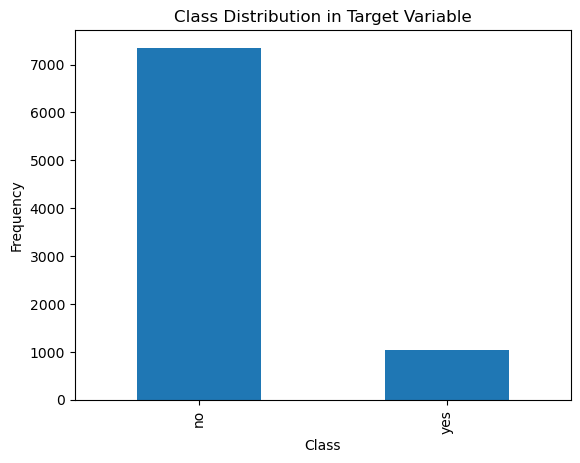

In [89]:
# Get value counts
target_counts = data['ARI'].value_counts()
print("Value Counts:\n", target_counts)

# Calculate proportions
target_proportions = data['ARI'].value_counts(normalize=True)
print("\nProportions:\n", target_proportions)

# Visualize the distribution
target_counts.plot(kind='bar')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [90]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(numeric_columns)

Numeric columns:
Index(['Type of place of residence', 'Highest eduction level',
       'Household has electricity', 'Wealth index combined',
       'Current breastfeeding', 'Child lives with whom',
       'Type of cooking fuel', 'Occupation', 'Drug',
       'Number of living children', 'Had diarrhea', 'Vitamin A supplement',
       'Age of child', 'stunting', 'wasting', 'Media', 'Mother's age',
       'Household members', 'Birth order', 'Mothers BMI'],
      dtype='object')


In [91]:
# Identify categorical or string columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical or string columns:")
print(categorical_columns)


Categorical or string columns:
Index(['ARI'], dtype='object')


In [92]:
unique_values = data['ARI'].unique()

# Print unique values
print(unique_values)

['no' 'yes']


In [93]:
 #Create a dictionary to map the values
ARI_mapping = {
   'no': 0,
   'yes': 1,
}

# Create a new column 'Vitamin A supplement' with the mapped values
data['ARI'] = data['ARI'].map(ARI_mapping)

# Print the first few rows to verify the new column
print(data.head())


   ARI  Type of place of residence  Highest eduction level  \
0    0                           1                1.000000   
1    0                           1                0.333333   
2    0                           1                0.666667   
4    0                           1                0.333333   
5    0                           1                0.666667   

   Household has electricity  Wealth index combined  Current breastfeeding  \
0                        0.0                   0.00                      1   
1                        0.0                   0.00                      1   
2                        1.0                   0.25                      1   
4                        0.0                   0.00                      1   
5                        0.0                   0.25                      0   

   Sex of the child_Male  Sex of the child_Female  Child lives with whom  \
0                   True                    False                    0.0   
1     

# correlation matrix

In [94]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Identify columns with very low correlation
low_correlation_threshold = 0.1
low_correlation_columns = [col for col in correlation_matrix.columns if all(abs(correlation_matrix[col]) < low_correlation_threshold)]

# Function to check imbalance for categorical columns
def check_imbalance(series, imbalance_threshold=0.9):
    counts = series.value_counts(normalize=True)
    return any(counts > imbalance_threshold)

# Identify highly imbalanced columns
imbalance_threshold = 0.9
imbalanced_columns = [col for col in data.columns if check_imbalance(data[col], imbalance_threshold)]

# Identify columns to drop due to low correlation or high imbalance
columns_to_drop = set(low_correlation_columns).union(set(imbalanced_columns))

# Drop the identified columns
data = data.drop(columns=columns_to_drop)

# Print dropped columns
print("Dropped columns due to low correlation or high imbalance:")
print(columns_to_drop)



Dropped columns due to low correlation or high imbalance:
{'Had diarrhea', 'wasting', 'Child lives with whom'}


<Axes: >

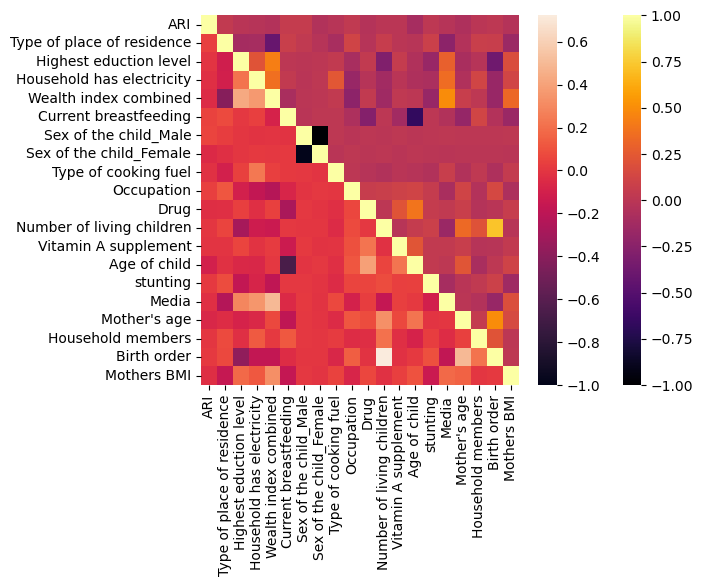

In [95]:
# compute the correlation among the variables
data.corr()

#see the correlation heatmap
sns.heatmap(data.corr(), cmap='inferno') #Very good correlation 

corr= data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(np.ones_like(corr))

# using the upper triangle matrix as mask 
sns.heatmap(data.corr(), mask=matrix)

# Divide the dataset into two(Urban~Rural)

In [96]:
# Assuming your DataFrame is named 'data'

# Filter rows where 'Type of place of residence' is 0
residence_type_Urban = data[data['Type of place of residence'] == 0]

# Filter rows where 'Type of place of residence' is 1
residence_type_Rural = data[data['Type of place of residence'] == 1]

# Print the first few rows of each subset to verify
print("Subset with 'Type of place of residence' = 0:")
print(residence_type_Urban.head())

print("\nSubset with 'Type of place of residence' = 1:")
print(residence_type_Rural.head())


Subset with 'Type of place of residence' = 0:
     ARI  Type of place of residence  Highest eduction level  \
633    0                           0                0.666667   
634    0                           0                0.666667   
635    0                           0                0.666667   
636    0                           0                1.000000   
637    0                           0                0.666667   

     Household has electricity  Wealth index combined  Current breastfeeding  \
633                        0.5                   0.50                      0   
634                        1.0                   0.50                      0   
635                        0.5                   0.50                      0   
636                        0.5                   1.00                      1   
637                        0.5                   0.75                      0   

     Sex of the child_Male  Sex of the child_Female  Type of cooking fuel  \
633        

In [97]:
# Assuming your datasets are named 'residence_type_Urban' and 'residence_type_Rural'
from sklearn.model_selection import train_test_split
# For residence_type_Urban dataset
X_urban = residence_type_Urban.drop(["ARI"], axis=1)
Y_urban = residence_type_Urban["ARI"]

# Train/Test split for residence_type_Urban dataset
x_train_urban, x_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, Y_urban, test_size=0.2, random_state=42)

# Nearmiss undersampling for residence_type_Urban dataset
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_train_nearmiss_urban, y_train_nearmiss_urban = nearmiss.fit_resample(x_train_urban, y_train_urban)

# Set the resampled dataset for experiment for residence_type_Urban dataset
x_train_urban, x_test_urban, y_train_urban, y_test_urban = train_test_split(X_train_nearmiss_urban, y_train_nearmiss_urban, test_size=0.2, random_state=42)

# Print the shape of the resampled dataset for residence_type_Urban dataset
print("Residence Type Urban - x_train : ", x_train_urban.shape)
print("Residence Type Urban - x_test : ", x_test_urban.shape)
print("Residence Type Urban - y_train : ", y_train_urban.shape)
print("Residence Type Urban - y_test : ", y_test_urban.shape)

# Convert the arrays or DataFrames to DataFrames if needed for residence_type_Urban dataset
x_train_urban_df = pd.DataFrame(x_train_urban)
x_test_urban_df = pd.DataFrame(x_test_urban)
y_train_urban_df = pd.DataFrame(y_train_urban)
y_test_urban_df = pd.DataFrame(y_test_urban)


# For residence_type_Rural dataset
X_rural = residence_type_Rural.drop(["ARI"], axis=1)
Y_rural = residence_type_Rural["ARI"]

# Train/Test split for residence_type_Rural dataset
x_train_rural, x_test_rural, y_train_rural, y_test_rural = train_test_split(X_rural, Y_rural, test_size=0.2, random_state=42)

# Nearmiss undersampling for residence_type_Rural dataset
nearmiss = NearMiss()
X_train_nearmiss_rural, y_train_nearmiss_rural = nearmiss.fit_resample(x_train_rural, y_train_rural)

# Set the resampled dataset for experiment for residence_type_Rural dataset
x_train_rural, x_test_rural, y_train_rural, y_test_rural = train_test_split(X_train_nearmiss_rural, y_train_nearmiss_rural, test_size=0.2, random_state=42)

# Print the shape of the resampled dataset for residence_type_Rural dataset
print("Residence Type Rural - x_train : ", x_train_rural.shape)
print("Residence Type Rural - x_test : ", x_test_rural.shape)
print("Residence Type Rural - y_train : ", y_train_rural.shape)
print("Residence Type Rural - y_test : ", y_test_rural.shape)

# Convert the arrays or DataFrames to DataFrames if needed for residence_type_Rural dataset
x_train_rural_df = pd.DataFrame(x_train_rural)
x_test_rural_df = pd.DataFrame(x_test_rural)
y_train_rural_df = pd.DataFrame(y_train_rural)
y_test_rural_df = pd.DataFrame(y_test_rural)


Residence Type Urban - x_train :  (412, 19)
Residence Type Urban - x_test :  (104, 19)
Residence Type Urban - y_train :  (412,)
Residence Type Urban - y_test :  (104,)
Residence Type Rural - x_train :  (942, 19)
Residence Type Rural - x_test :  (236, 19)
Residence Type Rural - y_train :  (942,)
Residence Type Rural - y_test :  (236,)


# resampling

In [98]:
# Baseline Model training with the raw dataset
from sklearn.ensemble import RandomForestClassifier
clf_urban = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(x_train_urban, y_train_urban)

from sklearn.metrics import classification_report
baseline_prediction_urban = clf_urban.predict(x_test_urban)

# Check the model performance
print('Baseline prediction-RandomForestClassifier for Residence Type Urban')
print(classification_report(y_test_urban, baseline_prediction_urban))

# Option one- Random oversampler/ Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros_urban = RandomOverSampler(random_state=42)
X_train_ros_urban, y_train_ros_urban = ros_urban.fit_resample(x_train_urban, y_train_urban)

# Check the number of records after over sampling
from collections import Counter
print(sorted(Counter(y_train_ros_urban).items()))

# Convert the resampled data to a pandas DataFrame
resampled_df_urban = pd.DataFrame(X_train_ros_urban, columns=x_train_urban.columns)
resampled_df_urban['outcomevar'] = y_train_ros_urban

# Fit the resampled data
ros_model_urban = clf_urban.fit(X_train_ros_urban, y_train_ros_urban)
ros_prediction_urban = ros_model_urban.predict(x_test_urban)

# Check the model performance
print('Random Oversampling for Residence Type Urban')
print(classification_report(y_test_urban, ros_prediction_urban))  # 40 % increase in recall

print("X_train_ros_urban shape:", X_train_ros_urban.shape)
print("x_test_urban shape:", x_test_urban.shape)

# SMOTE: Randomly over sample the minority class
from imblearn.over_sampling import SMOTE
smote_urban = SMOTE(random_state=42)
X_train_smote_urban, y_train_smote_urban = smote_urban.fit_resample(x_train_urban, y_train_urban)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote_urban).items()))

smote_model_urban = clf_urban.fit(X_train_smote_urban, y_train_smote_urban)
smote_prediction_urban = smote_model_urban.predict(x_test_urban)

# Check the model performance
print('SMOTE for Residence Type Urban')
print(classification_report(y_test_urban, smote_prediction_urban))  # recall increase to 61% but also accuracy down to 64%

# Now try nearmiss undersampling
from imblearn.under_sampling import NearMiss
nearmiss_urban = NearMiss()
X_train_nearmiss_urban, y_train_nearmiss_urban = nearmiss_urban.fit_resample(x_train_urban, y_train_urban)

# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss_urban).items()))

nearmiss_model_urban = clf_urban.fit(X_train_nearmiss_urban, y_train_nearmiss_urban)
nearmiss_prediction_urban = nearmiss_model_urban.predict(x_test_urban)

# Check the model performance
print('Nearmiss Undersampling for Residence Type Urban')
print(classification_report(y_test_urban, nearmiss_prediction_urban))  # recall 80%

# Randomly under sample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus_urban = RandomUnderSampler(random_state=42)
X_train_rus_urban, y_train_rus_urban = rus_urban.fit_resample(x_train_urban, y_train_urban)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus_urban).items()))

rus_model_urban = clf_urban.fit(X_train_rus_urban, y_train_rus_urban)
rus_prediction_urban = rus_model_urban.predict(x_test_urban)

# Check the model performance
print('Random Under-sampling for Residence Type Urban')
print(classification_report(y_test_urban, rus_prediction_urban))


Baseline prediction-RandomForestClassifier for Residence Type Urban
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        59
           1       0.84      0.71      0.77        45

    accuracy                           0.82       104
   macro avg       0.82      0.80      0.81       104
weighted avg       0.82      0.82      0.81       104

[(0, 213), (1, 213)]
Random Oversampling for Residence Type Urban
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.86      0.69      0.77        45

    accuracy                           0.82       104
   macro avg       0.83      0.80      0.81       104
weighted avg       0.82      0.82      0.81       104

X_train_ros_urban shape: (426, 19)
x_test_urban shape: (104, 19)
[(0, 213), (1, 213)]
SMOTE for Residence Type Urban
              precision    recall  f1-score   support

           0       0.79      0.92      0

In [99]:
# Baseline Model training with the raw dataset
from sklearn.ensemble import RandomForestClassifier
clf_rural = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(x_train_rural, y_train_rural)

from sklearn.metrics import classification_report
baseline_prediction_rural = clf_rural.predict(x_test_rural)

# Check the model performance
print('Baseline prediction-RandomForestClassifier for Residence Type Rural')
print(classification_report(y_test_rural, baseline_prediction_rural))

# Option one- Random oversampler/ Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros_rural = RandomOverSampler(random_state=42)
X_train_ros_rural, y_train_ros_rural = ros_rural.fit_resample(x_train_rural, y_train_rural)

# Check the number of records after over sampling
from collections import Counter
print(sorted(Counter(y_train_ros_rural).items()))

# Convert the resampled data to a pandas DataFrame
resampled_df_rural = pd.DataFrame(X_train_ros_rural, columns=x_train_rural.columns)
resampled_df_rural['outcomevar'] = y_train_ros_rural

# Fit the resampled data
ros_model_rural = clf_rural.fit(X_train_ros_rural, y_train_ros_rural)
ros_prediction_rural = ros_model_rural.predict(x_test_rural)

# Check the model performance
print('Random Oversampling for Residence Type Rural')
print(classification_report(y_test_rural, ros_prediction_rural))  # 40 % increase in recall

print("X_train_ros_rural shape:", X_train_ros_rural.shape)
print("x_test_rural shape:", x_test_rural.shape)

# SMOTE: Randomly over sample the minority class
from imblearn.over_sampling import SMOTE
smote_rural = SMOTE(random_state=42)
X_train_smote_rural, y_train_smote_rural = smote_rural.fit_resample(x_train_rural, y_train_rural)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote_rural).items()))

smote_model_rural = clf_rural.fit(X_train_smote_rural, y_train_smote_rural)
smote_prediction_rural = smote_model_rural.predict(x_test_rural)

# Check the model performance
print('SMOTE for Residence Type Rural')
print(classification_report(y_test_rural, smote_prediction_rural))  # recall increase to 61% but also accuracy down to 64%

# Now try nearmiss undersampling
from imblearn.under_sampling import NearMiss
nearmiss_rural = NearMiss()
X_train_nearmiss_rural, y_train_nearmiss_rural = nearmiss_rural.fit_resample(x_train_rural, y_train_rural)

# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss_rural).items()))

nearmiss_model_rural = clf_rural.fit(X_train_nearmiss_rural, y_train_nearmiss_rural)
nearmiss_prediction_rural = nearmiss_model_rural.predict(x_test_rural)

# Check the model performance
print('Nearmiss Undersampling for Residence Type Rural')
print(classification_report(y_test_rural, nearmiss_prediction_rural))  # recall 80%

# Randomly under sample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus_rural = RandomUnderSampler(random_state=42)
X_train_rus_rural, y_train_rus_rural = rus_rural.fit_resample(x_train_rural, y_train_rural)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus_rural).items()))

rus_model_rural = clf_rural.fit(X_train_rus_rural, y_train_rus_rural)
rus_prediction_rural = rus_model_rural.predict(x_test_rural)

# Check the model performance
print('Random Under-sampling for Residence Type Rural')
print(classification_report(y_test_rural, rus_prediction_rural))


Baseline prediction-RandomForestClassifier for Residence Type Rural
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       122
           1       0.70      0.63      0.66       114

    accuracy                           0.69       236
   macro avg       0.69      0.69      0.69       236
weighted avg       0.69      0.69      0.69       236

[(0, 475), (1, 475)]
Random Oversampling for Residence Type Rural
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       122
           1       0.71      0.64      0.67       114

    accuracy                           0.70       236
   macro avg       0.70      0.70      0.70       236
weighted avg       0.70      0.70      0.70       236

X_train_ros_rural shape: (950, 19)
x_test_rural shape: (236, 19)
[(0, 475), (1, 475)]
SMOTE for Residence Type Rural
              precision    recall  f1-score   support

           0       0.68      0.75      0

# Model training

In [100]:
# Model training~baseline model train for Residence Type Urban
from sklearn.ensemble import RandomForestClassifier
clf_urban = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(x_train_urban, y_train_urban)

from sklearn.metrics import classification_report
baseline_prediction_urban = clf_urban.predict(x_test_urban)

# Check the model performance
print("Baseline Model performance for Residence Type Urban:")
print(classification_report(y_test_urban, baseline_prediction_urban))

# Baseline Model hyperparameter tuning was done but no significant difference observed.
# Define the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_urban = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid_urban = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Define the K-Fold cross-validation
from sklearn.model_selection import KFold
kf_urban = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Grid Search with K-Fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search_urban = GridSearchCV(rf_urban, param_grid=param_grid_urban, cv=kf_urban)
grid_search_urban.fit(x_train_urban, y_train_urban)

# Print the best parameters and the best score
print("Best parameters for Residence Type Urban: ", grid_search_urban.best_params_)
print("Best score for Residence Type Urban: ", grid_search_urban.best_score_)

# Model training with tuned hyperparameters for Residence Type Urban
rf_tuned_urban = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42).fit(x_train_urban, y_train_urban)
tuned_baseline_prediction_urban = rf_tuned_urban.predict(x_test_urban)

# Check the model performance
print("Tuned Model performance for Residence Type Urban:")
print(classification_report(y_test_urban, tuned_baseline_prediction_urban))


Baseline Model performance for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        59
           1       0.84      0.71      0.77        45

    accuracy                           0.82       104
   macro avg       0.82      0.80      0.81       104
weighted avg       0.82      0.82      0.81       104

Best parameters for Residence Type Urban:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Best score for Residence Type Urban:  0.7717308257419925
Tuned Model performance for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        59
           1       0.84      0.69      0.76        45

    accuracy                           0.81       104
   macro avg       0.81      0.79      0.80       104
weighted avg       0.81      0.81      0.80  

In [101]:
# Model training~baseline model train for Residence Type Rural
from sklearn.ensemble import RandomForestClassifier
clf_rural = RandomForestClassifier(n_estimators=500, max_depth=4, max_features=3, bootstrap=True, random_state=18).fit(x_train_rural, y_train_rural)

from sklearn.metrics import classification_report
baseline_prediction_rural = clf_rural.predict(x_test_rural)

# Check the model performance
print("Baseline Model performance for Residence Type Rural:")
print(classification_report(y_test_rural, baseline_prediction_rural))

# Baseline Model hyperparameter tuning was done but no significant difference observed.
# Define the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_rural = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid_rural = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Define the K-Fold cross-validation
from sklearn.model_selection import KFold
kf_rural = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Grid Search with K-Fold cross-validation
from sklearn.model_selection import GridSearchCV
grid_search_rural = GridSearchCV(rf_rural, param_grid=param_grid_rural, cv=kf_rural)
grid_search_rural.fit(x_train_rural, y_train_rural)

# Print the best parameters and the best score
print("Best parameters for Residence Type Rural: ", grid_search_rural.best_params_)
print("Best score for Residence Type Rural: ", grid_search_rural.best_score_)

# Model training with tuned hyperparameters for Residence Type Rural
rf_tuned_rural = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42).fit(x_train_rural, y_train_rural)
tuned_baseline_prediction_rural = rf_tuned_rural.predict(x_test_rural)

# Check the model performance
print("Tuned Model performance for Residence Type Rural:")
print(classification_report(y_test_rural, tuned_baseline_prediction_rural))


Baseline Model performance for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       122
           1       0.70      0.63      0.66       114

    accuracy                           0.69       236
   macro avg       0.69      0.69      0.69       236
weighted avg       0.69      0.69      0.69       236

Best parameters for Residence Type Rural:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150, 'random_state': 42}
Best score for Residence Type Rural:  0.7345491388044578
Tuned Model performance for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       122
           1       0.71      0.67      0.69       114

    accuracy                           0.71       236
   macro avg       0.71      0.71      0.71       236
weighted avg       0.71      0.71      0.71    

# Model 1: DT (Decision Tree)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        46
           1       0.72      0.62      0.67        34

    accuracy                           0.74        80
   macro avg       0.73      0.72      0.73        80
weighted avg       0.74      0.74      0.73        80

Sensitivity for Residence Type Urban: 0.6176470588235294
Specificity for Residence Type Urban: 0.8260869565217391


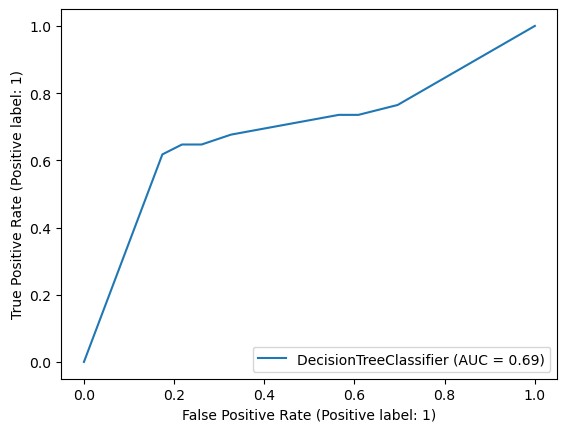

In [102]:
# Model 1: DT (Decision Tree) for Residence Type Urban

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

# Splitting the data
x_train_urban, x_test_urban, y_train_urban, y_test_urban = train_test_split(X_train_nearmiss_urban, y_train_nearmiss_urban, test_size=0.2, random_state=42)

# Initialize and train the tuned Decision Tree Classifier
dtc_tuned_urban = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
dtc_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
dtc_pred_urban = dtc_tuned_urban.predict(x_test_urban)
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, dtc_pred_urban))

#see the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, dtc_pred_urban)
sensitivity_urban = recall_score(y_test_urban, dtc_pred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)
#see the roc curve
from sklearn.metrics import RocCurveDisplay
# ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(dtc_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        95
           1       0.77      0.54      0.64        92

    accuracy                           0.70       187
   macro avg       0.71      0.69      0.69       187
weighted avg       0.71      0.70      0.69       187

Sensitivity for Residence Type Rural: 0.5434782608695652
Specificity for Residence Type Rural: 0.8421052631578947


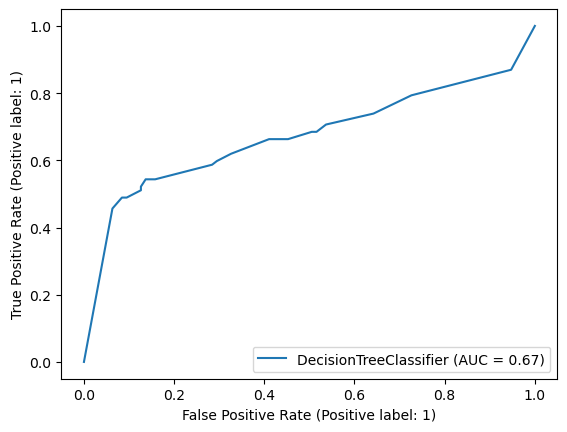

In [103]:
# Model 1: DT (Decision Tree) for Residence Type Rural

from sklearn.tree import DecisionTreeClassifier

# Splitting the data
x_train_rural, x_test_rural, y_train_rural, y_test_rural = train_test_split(X_train_nearmiss_rural, y_train_nearmiss_rural, test_size=0.2, random_state=42)

# Initialize and train the tuned Decision Tree Classifier
dtc_tuned_rural = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
dtc_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
dtc_pred_rural = dtc_tuned_rural.predict(x_test_rural)
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, dtc_pred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, dtc_pred_rural)
sensitivity_rural = recall_score(y_test_rural, dtc_pred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(dtc_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 2: RF (Random Forest)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        46
           1       0.70      0.82      0.76        34

    accuracy                           0.78        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.79      0.78      0.78        80

Sensitivity for Residence Type Urban: 0.8235294117647058
Specificity for Residence Type Urban: 0.7391304347826086


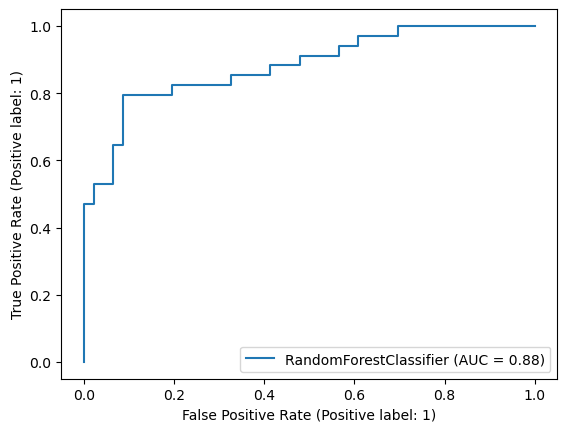

In [104]:
# Model 2: RF (Random Forest) for Residence Type Urban

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the tuned Random Forest Classifier
rfc_tuned_urban = RandomForestClassifier(criterion='gini', max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)
rfc_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
rfc_pred_urban = rfc_tuned_urban.predict(x_test_urban)
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, rfc_pred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, rfc_pred_urban)
sensitivity_urban = recall_score(y_test_urban, rfc_pred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(rfc_tuned_urban, x_test_urban, y_test_urban)
plt.show()



Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        95
           1       0.68      0.62      0.65        92

    accuracy                           0.67       187
   macro avg       0.67      0.67      0.67       187
weighted avg       0.67      0.67      0.67       187

Sensitivity for Residence Type Rural: 0.6195652173913043
Specificity for Residence Type Rural: 0.7157894736842105


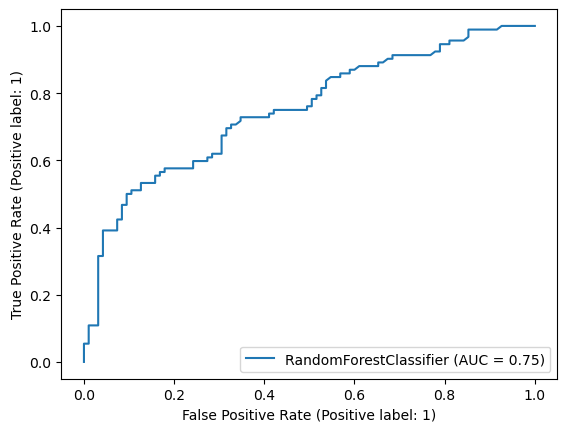

In [105]:
# Model 2: RF (Random Forest) for Residence Type Rural

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the tuned Random Forest Classifier
rfc_tuned_rural = RandomForestClassifier(criterion='gini', max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)
rfc_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
rfc_pred_rural = rfc_tuned_rural.predict(x_test_rural)
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, rfc_pred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, rfc_pred_rural)
sensitivity_rural = recall_score(y_test_rural, rfc_pred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(rfc_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 3: KNN (K nearest Neighbors)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        46
           1       0.74      0.68      0.71        34

    accuracy                           0.76        80
   macro avg       0.76      0.75      0.75        80
weighted avg       0.76      0.76      0.76        80

Sensitivity for Residence Type Urban: 0.6764705882352942
Specificity for Residence Type Urban: 0.8260869565217391


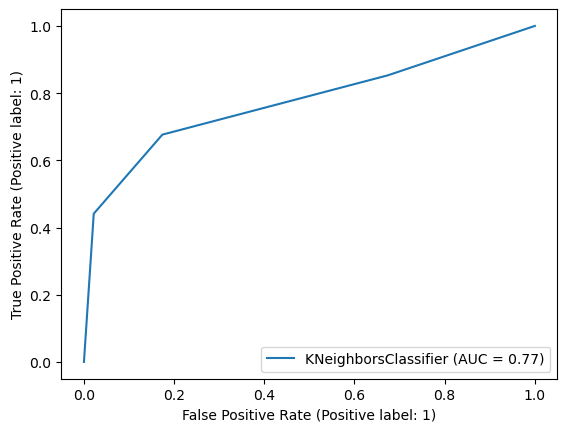

In [106]:
# Model 3: KNN (K nearest Neighbors) for Residence Type Urban

# Create a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
KNN_tuned_urban = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
KNN_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict the output for the test data
KNNpred_urban = KNN_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, KNNpred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, KNNpred_urban)
sensitivity_urban = recall_score(y_test_urban, KNNpred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(KNN_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        95
           1       0.59      0.50      0.54        92

    accuracy                           0.58       187
   macro avg       0.58      0.58      0.58       187
weighted avg       0.58      0.58      0.58       187

Sensitivity for Residence Type Rural: 0.5
Specificity for Residence Type Rural: 0.6631578947368421


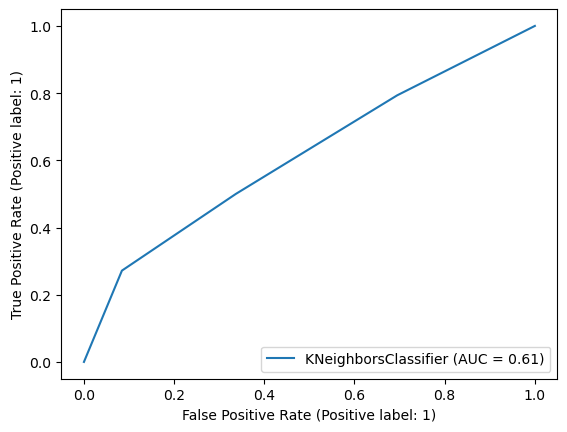

In [107]:
# Model 3: KNN (K nearest Neighbors) for Residence Type Rural

# Create a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
KNN_tuned_rural = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
KNN_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict the output for the test data
KNNpred_rural = KNN_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, KNNpred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, KNNpred_rural)
sensitivity_rural = recall_score(y_test_rural, KNNpred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(KNN_tuned_rural, x_test_rural, y_test_rural)
plt.show()

# Model 4: SVM (Support vector machine)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        46
           1       0.76      0.76      0.76        34

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

Sensitivity for Residence Type Urban: 0.7647058823529411
Specificity for Residence Type Urban: 0.8260869565217391


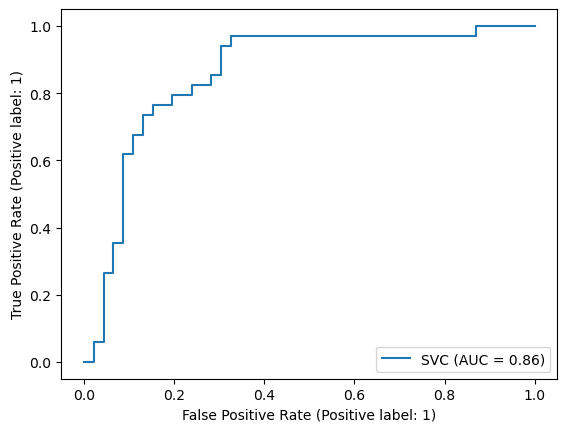

In [108]:
# Model 4: SVM (Support Vector Machine) for Residence Type Urban

from sklearn.svm import SVC

# Initialize and train the tuned SVM Classifier
svc_tuned_urban = SVC(probability=True, C=1, gamma=1, kernel='rbf')
svc_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
svc_pred_urban = svc_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, svc_pred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, svc_pred_urban)
sensitivity_urban = recall_score(y_test_urban, svc_pred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(svc_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        95
           1       0.70      0.65      0.67        92

    accuracy                           0.69       187
   macro avg       0.69      0.69      0.69       187
weighted avg       0.69      0.69      0.69       187

Sensitivity for Residence Type Rural: 0.6521739130434783
Specificity for Residence Type Rural: 0.7263157894736842


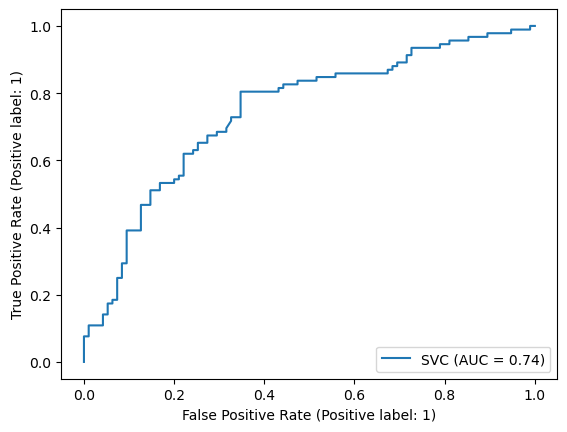

In [109]:
# Model 4: SVM (Support Vector Machine) for Residence Type Rural

from sklearn.svm import SVC

# Initialize and train the tuned SVM Classifier
svc_tuned_rural = SVC(probability=True, C=1, gamma=1, kernel='rbf')
svc_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
svc_pred_rural = svc_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, svc_pred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, svc_pred_rural)
sensitivity_rural = recall_score(y_test_rural, svc_pred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(svc_tuned_rural, x_test_rural, y_test_rural)
plt.show()



# Model 5: NB (Nieve bays)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        46
           1       0.73      0.71      0.72        34

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80

Sensitivity for Residence Type Urban: 0.7058823529411765
Specificity for Residence Type Urban: 0.8043478260869565


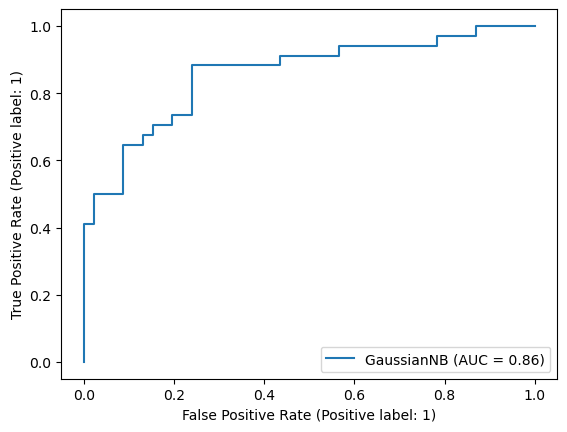

In [110]:
# Model 5: NB (Naive Bayes) for Residence Type Urban

from sklearn.naive_bayes import GaussianNB

# Initialize and train the tuned Naive Bayes Classifier
nb_tuned_urban = GaussianNB(var_smoothing=0.008111308307896872)
nb_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
Nbpred_urban = nb_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, Nbpred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, Nbpred_urban)
sensitivity_urban = recall_score(y_test_urban, Nbpred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(nb_tuned_urban, x_test_urban, y_test_urban)
plt.show()



Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        95
           1       0.74      0.60      0.66        92

    accuracy                           0.70       187
   macro avg       0.71      0.70      0.70       187
weighted avg       0.71      0.70      0.70       187

Sensitivity for Residence Type Rural: 0.5978260869565217
Specificity for Residence Type Rural: 0.8


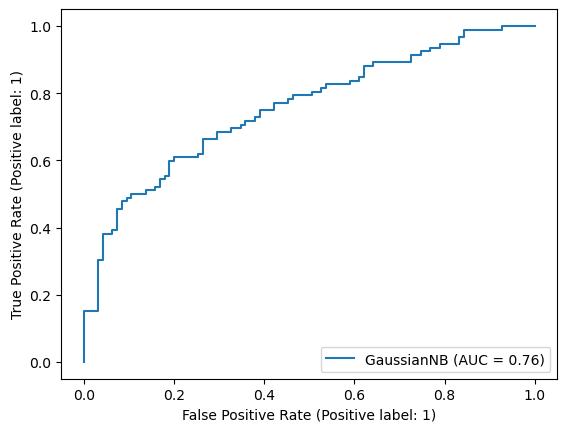

In [111]:
# Model 5: NB (Naive Bayes) for Residence Type Rural

from sklearn.naive_bayes import GaussianNB

# Initialize and train the tuned Naive Bayes Classifier
nb_tuned_rural = GaussianNB(var_smoothing=0.008111308307896872)
nb_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
Nbpred_rural = nb_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, Nbpred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, Nbpred_rural)
sensitivity_rural = recall_score(y_test_rural, Nbpred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(nb_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 6: LR (Logistic regression)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        46
           1       0.67      0.76      0.71        34

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.75      0.74      0.74        80

Sensitivity for Residence Type Urban: 0.7647058823529411
Specificity for Residence Type Urban: 0.717391304347826


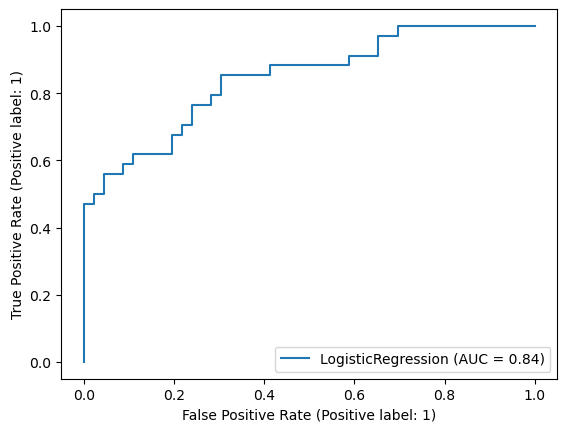

In [112]:
# Model 6: LR (Logistic Regression) for Residence Type Urban

from sklearn.linear_model import LogisticRegression

# Initialize and train the tuned Logistic Regression Classifier
lr_tuned_urban = LogisticRegression(C=10, penalty='l2')
lr_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
LRpred_urban = lr_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, LRpred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, LRpred_urban)
sensitivity_urban = recall_score(y_test_urban, LRpred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(lr_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        95
           1       0.66      0.62      0.64        92

    accuracy                           0.66       187
   macro avg       0.66      0.66      0.66       187
weighted avg       0.66      0.66      0.66       187

Sensitivity for Residence Type Rural: 0.6195652173913043
Specificity for Residence Type Rural: 0.6947368421052632


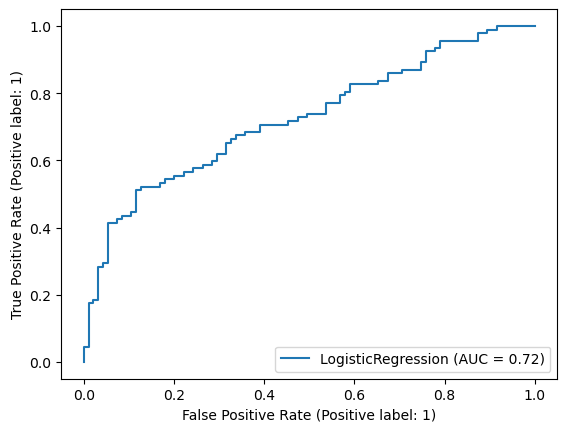

In [113]:
# Model 6: LR (Logistic Regression) for Residence Type Rural

from sklearn.linear_model import LogisticRegression

# Initialize and train the tuned Logistic Regression Classifier
lr_tuned_rural = LogisticRegression(C=10, penalty='l2')
lr_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
LRpred_rural = lr_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, LRpred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, LRpred_rural)
sensitivity_rural = recall_score(y_test_rural, LRpred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(lr_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 7: GB (Gradiant boosting)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        46
           1       0.69      0.85      0.76        34

    accuracy                           0.78        80
   macro avg       0.78      0.79      0.77        80
weighted avg       0.79      0.78      0.78        80

Sensitivity for Residence Type Urban: 0.8529411764705882
Specificity for Residence Type Urban: 0.717391304347826


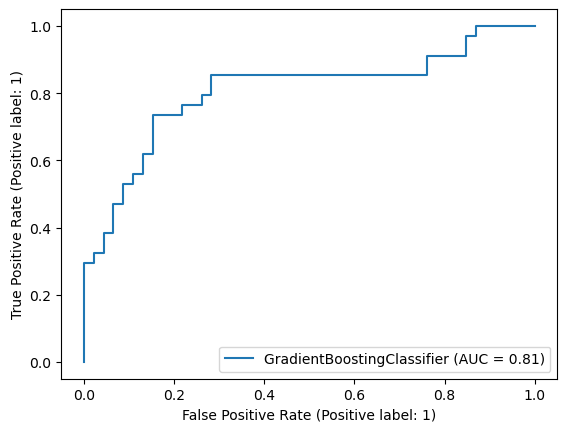

In [114]:
# Model 7: GB (Gradient Boosting) for Residence Type Urban

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the tuned Gradient Boosting Classifier
gb_tuned_urban = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gb_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
GBpred_urban = gb_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, GBpred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, GBpred_urban)
sensitivity_urban = recall_score(y_test_urban, GBpred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(gb_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        95
           1       0.70      0.70      0.70        92

    accuracy                           0.70       187
   macro avg       0.70      0.70      0.70       187
weighted avg       0.70      0.70      0.70       187

Sensitivity for Residence Type Rural: 0.6956521739130435
Specificity for Residence Type Rural: 0.7052631578947368


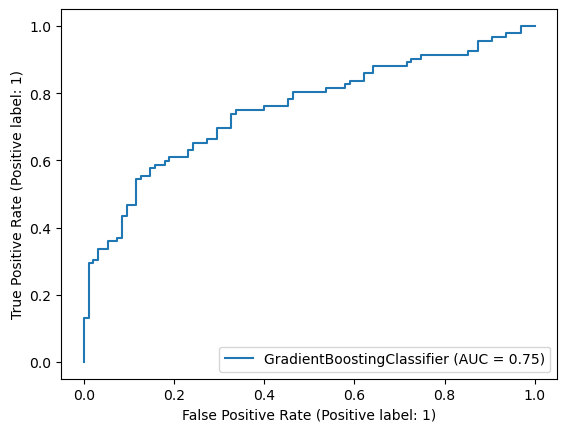

In [115]:
# Model 7: GB (Gradient Boosting) for Residence Type Rural

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the tuned Gradient Boosting Classifier
gb_tuned_rural = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gb_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
GBpred_rural = gb_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, GBpred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, GBpred_rural)
sensitivity_rural = recall_score(y_test_rural, GBpred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(gb_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 8: XGB (eXtreme gradiant boosting)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        46
           1       0.72      0.76      0.74        34

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80

Sensitivity for Residence Type Urban: 0.7647058823529411
Specificity for Residence Type Urban: 0.782608695652174


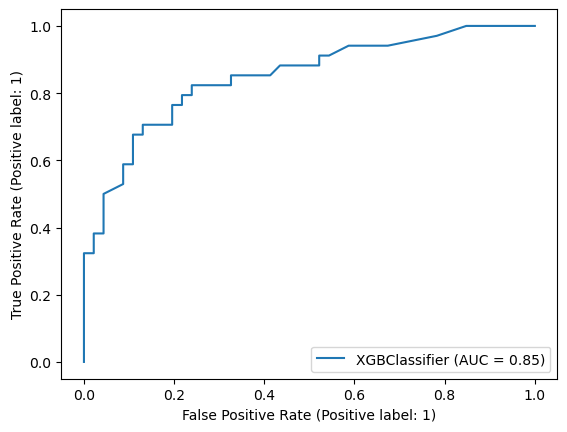

In [116]:
# Model 8: XGB (eXtreme Gradient Boosting) for Residence Type Urban

from xgboost import XGBClassifier

# Initialize and train the tuned XGB Classifier
xgb_tuned_urban = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
xgb_tuned_urban.fit(x_train_urban, y_train_urban)

# Predict
XGBpred_urban = xgb_tuned_urban.predict(x_test_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, XGBpred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, XGBpred_urban)
sensitivity_urban = recall_score(y_test_urban, XGBpred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

# Plot ROC Curve
rfc_disp_urban = RocCurveDisplay.from_estimator(xgb_tuned_urban, x_test_urban, y_test_urban)
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        95
           1       0.68      0.60      0.64        92

    accuracy                           0.66       187
   macro avg       0.66      0.66      0.66       187
weighted avg       0.66      0.66      0.66       187

Sensitivity for Residence Type Rural: 0.5978260869565217
Specificity for Residence Type Rural: 0.7263157894736842


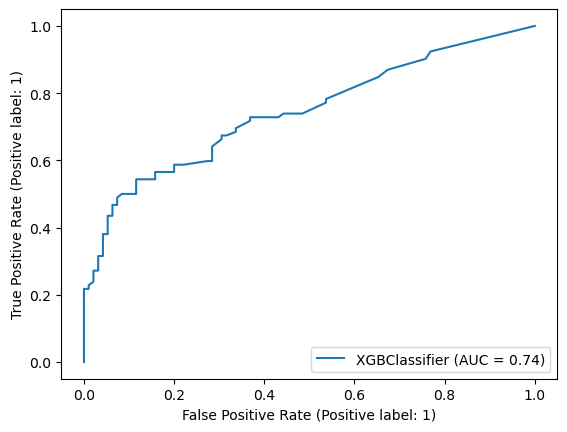

In [117]:
# Model 8: XGB (eXtreme Gradient Boosting) for Residence Type Rural

from xgboost import XGBClassifier

# Initialize and train the tuned XGB Classifier
xgb_tuned_rural = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
xgb_tuned_rural.fit(x_train_rural, y_train_rural)

# Predict
XGBpred_rural = xgb_tuned_rural.predict(x_test_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, XGBpred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, XGBpred_rural)
sensitivity_rural = recall_score(y_test_rural, XGBpred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
rfc_disp_rural = RocCurveDisplay.from_estimator(xgb_tuned_rural, x_test_rural, y_test_rural)
plt.show()


# Model 9: LAssoR (Lasso regression)

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        46
           1       0.69      0.74      0.71        34

    accuracy                           0.75        80
   macro avg       0.74      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80

Sensitivity for Residence Type Urban: 0.7352941176470589
Specificity for Residence Type Urban: 0.7608695652173914


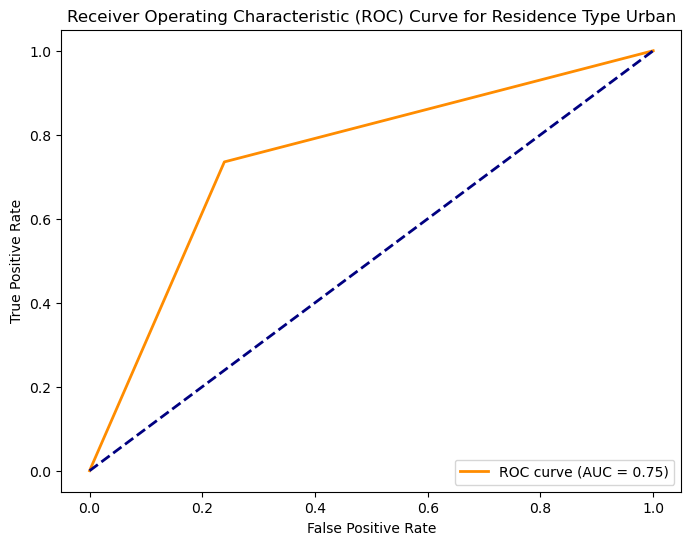

In [118]:
# Model 9: LAssoR (Lasso regression) for Residence Type Urban

from sklearn.linear_model import LassoCV

# Initialize and train the tuned Lasso Regression model
lasso_tuned_urban = LassoCV(cv=5, eps=0.01, n_alphas=50)
lasso_tuned_urban.fit(x_train_urban, y_train_urban)

# Make predictions on the test set
LAsopred_urban = lasso_tuned_urban.predict(x_test_urban).round()

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_test_urban, LAsopred_urban))

# Calculate metrics
cm_urban = confusion_matrix(y_test_urban, LAsopred_urban)
sensitivity_urban = recall_score(y_test_urban, LAsopred_urban)
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print metrics
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Plot ROC Curve
fpr_urban, tpr_urban, thresholds_rand_urban = roc_curve(y_test_urban, LAsopred_urban)
roc_auc_urban = auc(fpr_urban, tpr_urban)
plt.figure(figsize=(8, 6))
plt.plot(fpr_urban, tpr_urban, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_urban)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Residence Type Urban')
plt.legend(loc="lower right")
plt.show()


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68        95
           1       0.67      0.63      0.65        92

    accuracy                           0.66       187
   macro avg       0.66      0.66      0.66       187
weighted avg       0.66      0.66      0.66       187

Sensitivity for Residence Type Rural: 0.6304347826086957
Specificity for Residence Type Rural: 0.6947368421052632


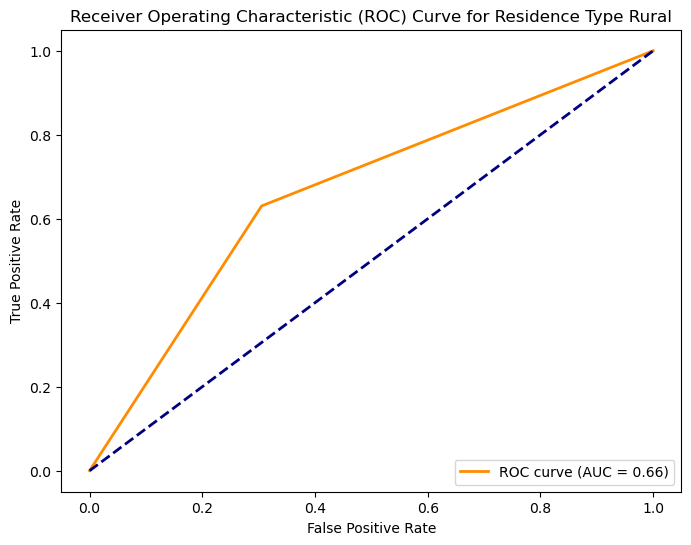

In [119]:
# Model 9: LAssoR (Lasso regression) for Residence Type Rural

from sklearn.linear_model import LassoCV

# Initialize and train the tuned Lasso Regression model
lasso_tuned_rural = LassoCV(cv=5, eps=0.01, n_alphas=50)
lasso_tuned_rural.fit(x_train_rural, y_train_rural)

# Make predictions on the test set
LAsopred_rural = lasso_tuned_rural.predict(x_test_rural).round()

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_test_rural, LAsopred_rural))

# Calculate metrics
cm_rural = confusion_matrix(y_test_rural, LAsopred_rural)
sensitivity_rural = recall_score(y_test_rural, LAsopred_rural)
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print metrics
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)

# Plot ROC Curve
fpr_rural, tpr_rural, thresholds_rand_rural = roc_curve(y_test_rural, LAsopred_rural)
roc_auc_rural = auc(fpr_rural, tpr_rural)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rural, tpr_rural, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rural)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Residence Type Rural')
plt.legend(loc="lower right")
plt.show()


# Model 10: Ensemble Learning 

Classification Report for Residence Type Urban:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       153
           1       0.97      0.92      0.94       165

    accuracy                           0.94       318
   macro avg       0.94      0.94      0.94       318
weighted avg       0.95      0.94      0.94       318



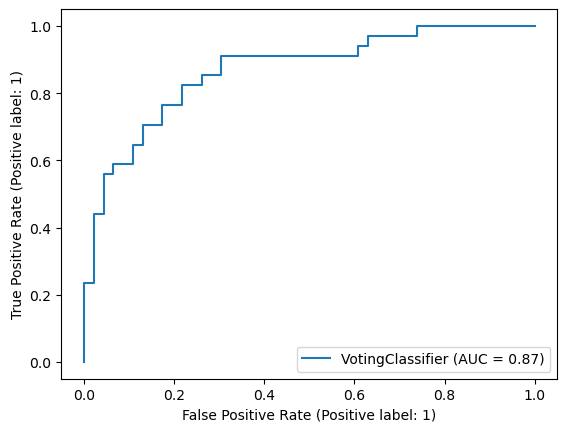

Sensitivity for Residence Type Urban: 0.7941176470588235
Specificity for Residence Type Urban: 0.7608695652173914


In [120]:
# Model 10: Ensemble Learning for Residence Type Urban

# Import required libraries
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble_model_urban = VotingClassifier(estimators=[('svm',svc_tuned_urban), ('gb', gb_tuned_urban), ('xgb', xgb_tuned_urban)], voting='soft')

# Fit the ensemble model to the data
ensemble_model_urban.fit(x_train_urban, y_train_urban)

# Predict the target variable
y_pred_ensemble_urban = ensemble_model_urban.predict(x_train_urban)

# Print the classification report
print("Classification Report for Residence Type Urban:")
print(classification_report(y_train_urban, y_pred_ensemble_urban))

# Plot ROC Curve
rfc_disp = RocCurveDisplay.from_estimator(ensemble_model_urban, x_test_urban, y_test_urban)
plt.show()

# Ensure the predictions have the same number of samples
min_samples = min(len(svc_pred_urban), len(GBpred_urban), len(XGBpred_urban))
svm_predictions_urban = svc_pred_urban[:min_samples]
xg_predictions_urban = GBpred_urban[:min_samples]
xgb_predictions_urban = XGBpred_urban[:min_samples]
y_test_urban = y_test_urban[:min_samples]

ensemble_predictions_urban = []
for i in range(len(y_test_urban)):
    # Majority voting
    votes = svc_pred_urban[i] + GBpred_urban[i] + XGBpred_urban[i]
    ensemble_predictions_urban.append(1 if votes >= 2 else 0)

# Calculate confusion matrix
cm_urban = confusion_matrix(y_test_urban, ensemble_predictions_urban)

# Calculate sensitivity/recall
sensitivity_urban = recall_score(y_test_urban, ensemble_predictions_urban)

# Calculate specificity
specificity_urban = cm_urban[0, 0] / (cm_urban[0, 0] + cm_urban[0, 1])

# Print the results
print("Sensitivity for Residence Type Urban:", sensitivity_urban)
print("Specificity for Residence Type Urban:", specificity_urban)


Classification Report for Residence Type Rural:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       372
           1       0.94      0.88      0.91       375

    accuracy                           0.91       747
   macro avg       0.91      0.91      0.91       747
weighted avg       0.91      0.91      0.91       747



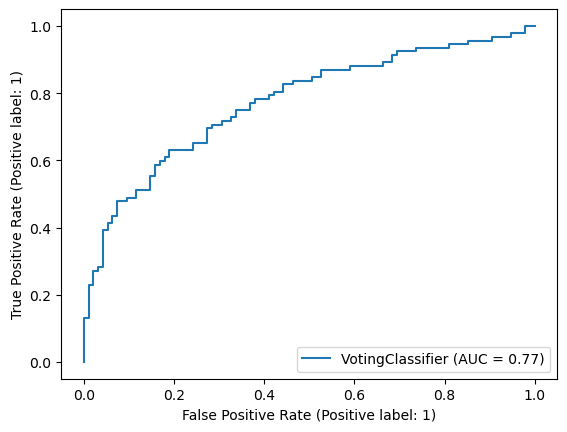

Sensitivity for Residence Type Rural: 0.6630434782608695
Specificity for Residence Type Rural: 0.7263157894736842


In [121]:
# Model 10: Ensemble Learning for Residence Type Rural

# Import required libraries
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble_model_rural = VotingClassifier(estimators=[('svm',svc_tuned_rural), ('gb', gb_tuned_rural), ('xgb', xgb_tuned_rural)], voting='soft')

# Fit the ensemble model to the data
ensemble_model_rural.fit(x_train_rural, y_train_rural)

# Predict the target variable
y_pred_ensemble_rural = ensemble_model_rural.predict(x_train_rural)

# Print the classification report
print("Classification Report for Residence Type Rural:")
print(classification_report(y_train_rural, y_pred_ensemble_rural))

# Plot ROC Curve
rfc_disp = RocCurveDisplay.from_estimator(ensemble_model_rural, x_test_rural, y_test_rural)
plt.show()

# Ensure the predictions have the same number of samples
min_samples = min(len(svc_pred_rural), len(GBpred_rural), len(XGBpred_rural))
svm_predictions_rural = svc_pred_rural[:min_samples]
xg_predictions_rural = GBpred_rural[:min_samples]
xgb_predictions_rural = XGBpred_rural[:min_samples]
y_test_rural = y_test_rural[:min_samples]

ensemble_predictions_rural = []
for i in range(len(y_test_rural)):
    # Majority voting
    votes = svc_pred_rural[i] + GBpred_rural[i] + XGBpred_rural[i]
    ensemble_predictions_rural.append(1 if votes >= 2 else 0)

# Calculate confusion matrix
cm_rural = confusion_matrix(y_test_rural, ensemble_predictions_rural)

# Calculate sensitivity/recall
sensitivity_rural = recall_score(y_test_rural, ensemble_predictions_rural)

# Calculate specificity
specificity_rural = cm_rural[0, 0] / (cm_rural[0, 0] + cm_rural[0, 1])

# Print the results
print("Sensitivity for Residence Type Rural:", sensitivity_rural)
print("Specificity for Residence Type Rural:", specificity_rural)


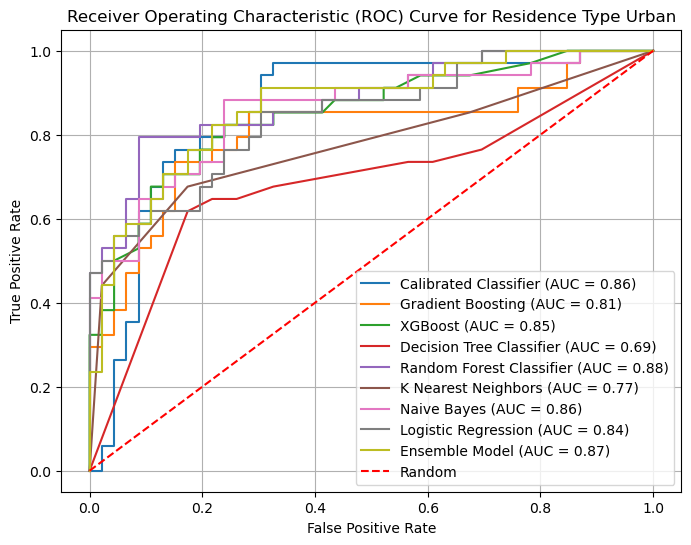

In [122]:
# Compute the ROC curve and AUC for each model
dt_probabilities_urban = dtc_tuned_urban.predict_proba(x_test_urban)[:, 1]
rf_probabilities_urban = rfc_tuned_urban.predict_proba(x_test_urban)[:, 1]
knn_probabilities_urban = KNN_tuned_urban.predict_proba(x_test_urban)[:, 1]
nb_probabilities_urban = nb_tuned_urban.predict_proba(x_test_urban)[:, 1]
lr_probabilities_urban = lr_tuned_urban.predict_proba(x_test_urban)[:, 1]
svm_probabilities_urban = svc_tuned_urban.predict_proba(x_test_urban)[:, 1]
xg_probabilities_urban = gb_tuned_urban.predict_proba(x_test_urban)[:, 1]
xgb_probabilities_urban = xgb_tuned_urban.predict_proba(x_test_urban)[:, 1]
ensemble_probabilities_urban = ensemble_model_urban.predict_proba(x_test_urban)[:, 1]

# Compute the ROC curve and AUC for each model
svm_fpr_urban, svm_tpr_urban, _ = roc_curve(y_test_urban, svm_probabilities_urban)
svm_auc_urban = auc(svm_fpr_urban, svm_tpr_urban)

dt_fpr_urban, dt_tpr_urban, _ = roc_curve(y_test_urban, dt_probabilities_urban)
dt_auc_urban = auc(dt_fpr_urban, dt_tpr_urban)

rf_fpr_urban, rf_tpr_urban, _ = roc_curve(y_test_urban, rf_probabilities_urban)
rf_auc_urban = auc(rf_fpr_urban, rf_tpr_urban)

knn_fpr_urban, knn_tpr_urban, _ = roc_curve(y_test_urban, knn_probabilities_urban)
knn_auc_urban = auc(knn_fpr_urban, knn_tpr_urban)

nb_fpr_urban, nb_tpr_urban, _ = roc_curve(y_test_urban, nb_probabilities_urban)
nb_auc_urban = auc(nb_fpr_urban, nb_tpr_urban)

lr_fpr_urban, lr_tpr_urban, _ = roc_curve(y_test_urban, lr_probabilities_urban)
lr_auc_urban = auc(lr_fpr_urban, lr_tpr_urban)

xg_fpr_urban, xg_tpr_urban, _ = roc_curve(y_test_urban, xg_probabilities_urban)
xg_auc_urban = auc(xg_fpr_urban, xg_tpr_urban)

xgb_fpr_urban, xgb_tpr_urban, _ = roc_curve(y_test_urban, xgb_probabilities_urban)
xgb_auc_urban = auc(xgb_fpr_urban, xgb_tpr_urban)

ensemble_fpr_urban, ensemble_tpr_urban, _ = roc_curve(y_test_urban, ensemble_probabilities_urban)
ensemble_auc_urban = auc(ensemble_fpr_urban, ensemble_tpr_urban)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr_urban, svm_tpr_urban, label='Calibrated Classifier (AUC = {:.2f})'.format(svm_auc_urban))
plt.plot(xg_fpr_urban, xg_tpr_urban, label='Gradient Boosting (AUC = {:.2f})'.format(xg_auc_urban))
plt.plot(xgb_fpr_urban, xgb_tpr_urban, label='XGBoost (AUC = {:.2f})'.format(xgb_auc_urban))
plt.plot(dt_fpr_urban, dt_tpr_urban, label='Decision Tree Classifier (AUC = {:.2f})'.format(dt_auc_urban))
plt.plot(rf_fpr_urban, rf_tpr_urban, label='Random Forest Classifier (AUC = {:.2f})'.format(rf_auc_urban))
plt.plot(knn_fpr_urban, knn_tpr_urban, label='K Nearest Neighbors (AUC = {:.2f})'.format(knn_auc_urban))
plt.plot(nb_fpr_urban, nb_tpr_urban, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc_urban))
plt.plot(lr_fpr_urban, lr_tpr_urban, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc_urban))
plt.plot(ensemble_fpr_urban, ensemble_tpr_urban, label='Ensemble Model (AUC = {:.2f})'.format(ensemble_auc_urban))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Residence Type Urban')
plt.legend()
plt.grid(True)
plt.show()


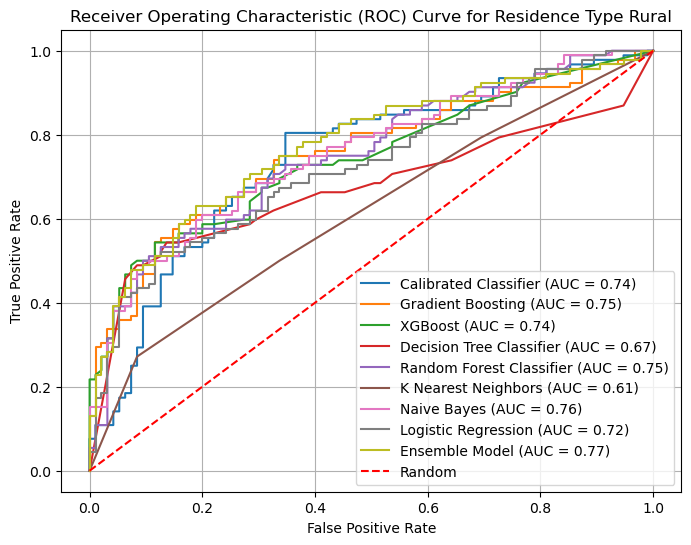

In [123]:
# Compute the ROC curve and AUC for each model
dt_probabilities_rural = dtc_tuned_rural.predict_proba(x_test_rural)[:, 1]
rf_probabilities_rural = rfc_tuned_rural.predict_proba(x_test_rural)[:, 1]
knn_probabilities_rural = KNN_tuned_rural.predict_proba(x_test_rural)[:, 1]
nb_probabilities_rural = nb_tuned_rural.predict_proba(x_test_rural)[:, 1]
lr_probabilities_rural = lr_tuned_rural.predict_proba(x_test_rural)[:, 1]
svm_probabilities_rural = svc_tuned_rural.predict_proba(x_test_rural)[:, 1]
xg_probabilities_rural = gb_tuned_rural.predict_proba(x_test_rural)[:, 1]
xgb_probabilities_rural = xgb_tuned_rural.predict_proba(x_test_rural)[:, 1]
ensemble_probabilities_rural = ensemble_model_rural.predict_proba(x_test_rural)[:, 1]

# Compute the ROC curve and AUC for each model
svm_fpr_rural, svm_tpr_rural, _ = roc_curve(y_test_rural, svm_probabilities_rural)
svm_auc_rural = auc(svm_fpr_rural, svm_tpr_rural)

dt_fpr_rural, dt_tpr_rural, _ = roc_curve(y_test_rural, dt_probabilities_rural)
dt_auc_rural = auc(dt_fpr_rural, dt_tpr_rural)

rf_fpr_rural, rf_tpr_rural, _ = roc_curve(y_test_rural, rf_probabilities_rural)
rf_auc_rural = auc(rf_fpr_rural, rf_tpr_rural)

knn_fpr_rural, knn_tpr_rural, _ = roc_curve(y_test_rural, knn_probabilities_rural)
knn_auc_rural = auc(knn_fpr_rural, knn_tpr_rural)

nb_fpr_rural, nb_tpr_rural, _ = roc_curve(y_test_rural, nb_probabilities_rural)
nb_auc_rural = auc(nb_fpr_rural, nb_tpr_rural)

lr_fpr_rural, lr_tpr_rural, _ = roc_curve(y_test_rural, lr_probabilities_rural)
lr_auc_rural = auc(lr_fpr_rural, lr_tpr_rural)

xg_fpr_rural, xg_tpr_rural, _ = roc_curve(y_test_rural, xg_probabilities_rural)
xg_auc_rural = auc(xg_fpr_rural, xg_tpr_rural)

xgb_fpr_rural, xgb_tpr_rural, _ = roc_curve(y_test_rural, xgb_probabilities_rural)
xgb_auc_rural = auc(xgb_fpr_rural, xgb_tpr_rural)

ensemble_fpr_rural, ensemble_tpr_rural, _ = roc_curve(y_test_rural, ensemble_probabilities_rural)
ensemble_auc_rural = auc(ensemble_fpr_rural, ensemble_tpr_rural)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr_rural, svm_tpr_rural, label='Calibrated Classifier (AUC = {:.2f})'.format(svm_auc_rural))
plt.plot(xg_fpr_rural, xg_tpr_rural, label='Gradient Boosting (AUC = {:.2f})'.format(xg_auc_rural))
plt.plot(xgb_fpr_rural, xgb_tpr_rural, label='XGBoost (AUC = {:.2f})'.format(xgb_auc_rural))
plt.plot(dt_fpr_rural, dt_tpr_rural, label='Decision Tree Classifier (AUC = {:.2f})'.format(dt_auc_rural))
plt.plot(rf_fpr_rural, rf_tpr_rural, label='Random Forest Classifier (AUC = {:.2f})'.format(rf_auc_rural))
plt.plot(knn_fpr_rural, knn_tpr_rural, label='K Nearest Neighbors (AUC = {:.2f})'.format(knn_auc_rural))
plt.plot(nb_fpr_rural, nb_tpr_rural, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc_rural))
plt.plot(lr_fpr_rural, lr_tpr_rural, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc_rural))
plt.plot(ensemble_fpr_rural, ensemble_tpr_rural, label='Ensemble Model (AUC = {:.2f})'.format(ensemble_auc_rural))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Residence Type Rural')
plt.legend()
plt.grid(True)
plt.show()


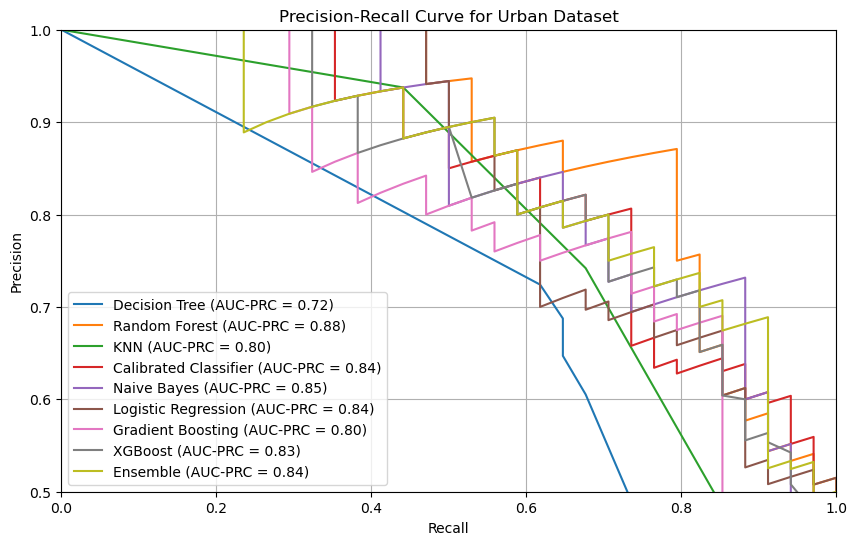

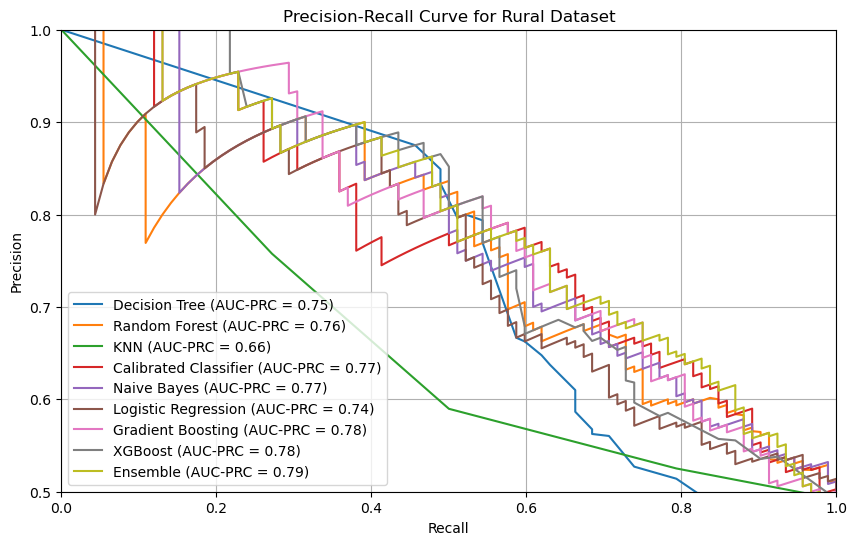

In [125]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Urban Dataset
# Train the SVM model with probability=True to enable Platt scaling
svc_new_urban = SVC(probability=True)
svc_new_urban.fit(x_train_urban, y_train_urban)

# Calibrate the classifier to obtain probability estimates
calibrated_classifier_urban = CalibratedClassifierCV(svc_new_urban, method='sigmoid', cv='prefit')
calibrated_classifier_urban.fit(x_train_urban, y_train_urban)

# Get predicted probabilities for the positive class (class 1)
svm_new_pred_urban = calibrated_classifier_urban.predict_proba(x_test_urban)[:, 1]

# Define your trained models for the urban dataset
models_urban = [dtc_tuned_urban, rfc_tuned_urban, KNN_tuned_urban, calibrated_classifier_urban, nb_tuned_urban, lr_tuned_urban, gb_tuned_urban, xgb_tuned_urban, ensemble_model_urban]
model_names_urban = ['Decision Tree', 'Random Forest', 'KNN', 'Calibrated Classifier', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'Ensemble']

# Plot AUC-PRC for each model for the urban dataset
plt.figure(figsize=(10, 6))
for model, name in zip(models_urban, model_names_urban):
    # Generate model predictions or decision scores for the test set
    y_score_urban = model.predict_proba(x_test_urban)[:, 1]

    # Calculate precision and recall
    precision_urban, recall_urban, _urban = precision_recall_curve(y_test_urban, y_score_urban)

    # Calculate AUC-PRC
    auc_prc_urban = auc(recall_urban, precision_urban)

    # Plot the PR curve for each model
    plt.plot(recall_urban, precision_urban, label=f'{name} (AUC-PRC = {auc_prc_urban:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Urban Dataset')
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0.5, 1])
plt.show()

# Rural Dataset
# Train the SVM model with probability=True to enable Platt scaling
svc_new_rural = SVC(probability=True)
svc_new_rural.fit(x_train_rural, y_train_rural)

# Calibrate the classifier to obtain probability estimates
calibrated_classifier_rural = CalibratedClassifierCV(svc_new_rural, method='sigmoid', cv='prefit')
calibrated_classifier_rural.fit(x_train_rural, y_train_rural)

# Get predicted probabilities for the positive class (class 1)
svm_new_pred_rural = calibrated_classifier_rural.predict_proba(x_test_rural)[:, 1]

# Define your trained models for the rural dataset
models_rural = [dtc_tuned_rural, rfc_tuned_rural, KNN_tuned_rural, calibrated_classifier_rural, nb_tuned_rural, lr_tuned_rural, gb_tuned_rural, xgb_tuned_rural, ensemble_model_rural]
model_names_rural = ['Decision Tree', 'Random Forest', 'KNN', 'Calibrated Classifier', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'Ensemble']

# Plot AUC-PRC for each model for the rural dataset
plt.figure(figsize=(10, 6))
for model, name in zip(models_rural, model_names_rural):
    # Generate model predictions or decision scores for the test set
    y_score_rural = model.predict_proba(x_test_rural)[:, 1]

    # Calculate precision and recall
    precision_rural, recall_rural, _rural = precision_recall_curve(y_test_rural, y_score_rural)

    # Calculate AUC-PRC
    auc_prc_rural = auc(recall_rural, precision_rural)

    # Plot the PR curve for each model
    plt.plot(recall_rural, precision_rural, label=f'{name} (AUC-PRC = {auc_prc_rural:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Rural Dataset')
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0.5, 1])
plt.show()


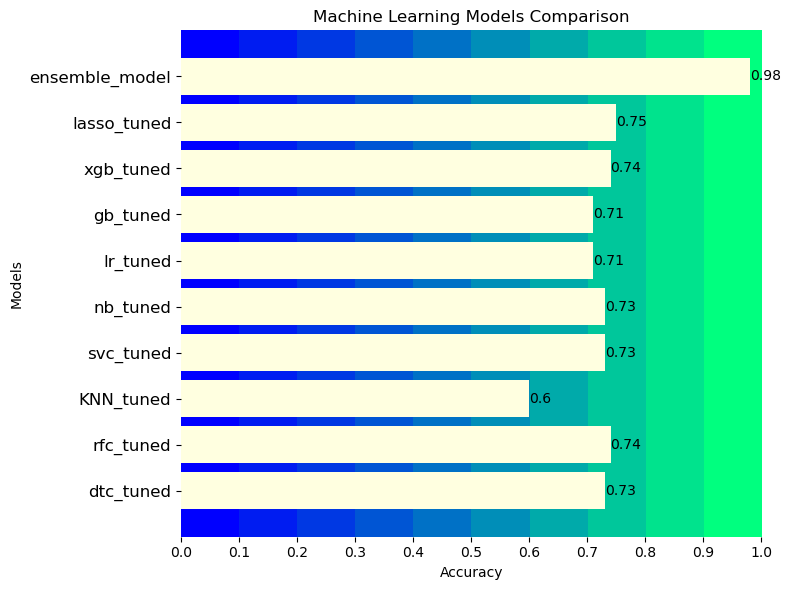

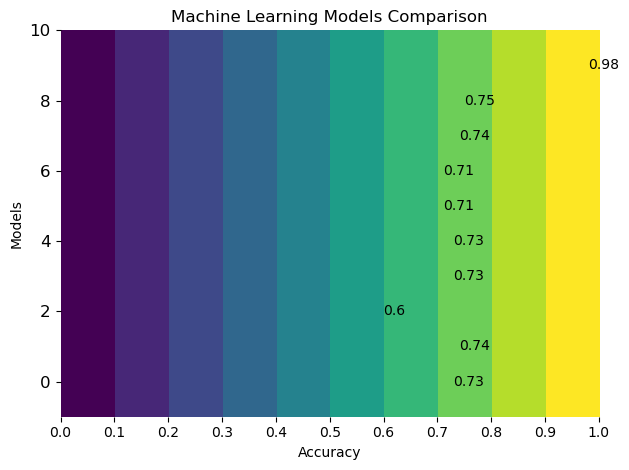

In [126]:
# List of model names and their corresponding accuracy scores
model_names = ['dtc_tuned', 'rfc_tuned', 'KNN_tuned', 'svc_tuned', 'nb_tuned', 'lr_tuned', 'gb_tuned', 'xgb_tuned', 'lasso_tuned', 'ensemble_model']
accuracy_scores = [0.73, 0.74, 0.60, 0.73, 0.73, 0.71, 0.71, 0.74, 0.75, 0.98]

# Set colors for the bars
colors = ['lightyellow']

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracy_scores, color=colors)
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison')

# Add data values to the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='winter', extent=(0, 1, -1, len(model_names)))
# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison')

# Add data values to the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='viridis', extent=(0, 1, -1, len(model_names)))

# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


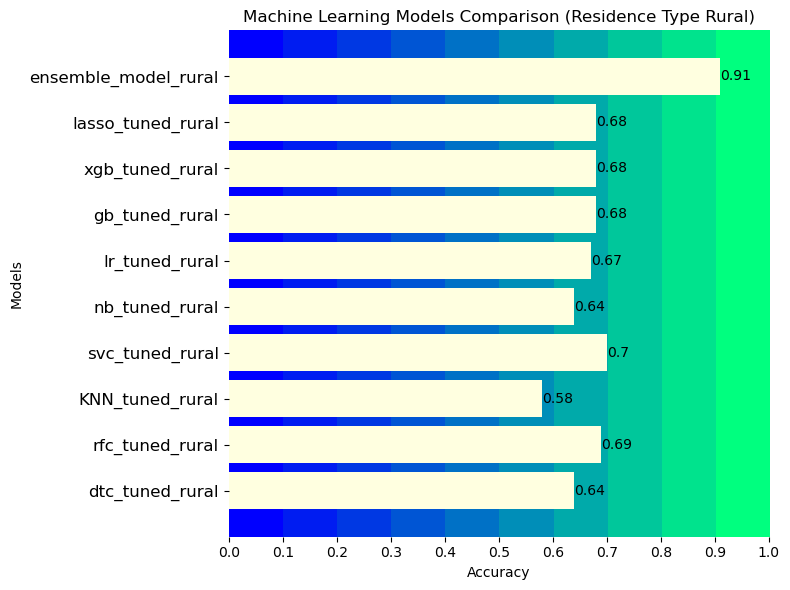

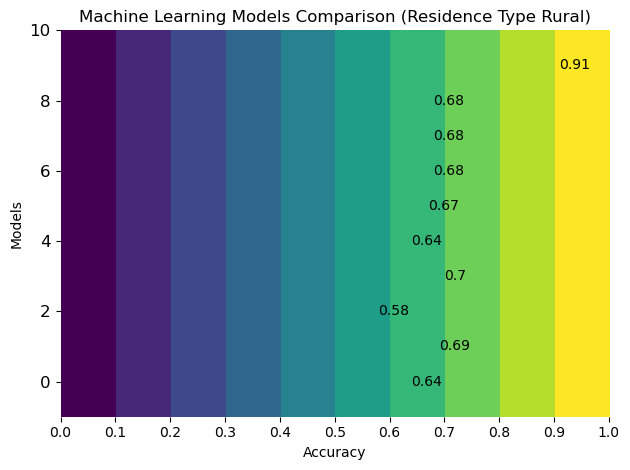

In [127]:
# List of model names and their corresponding accuracy scores
model_names_rural = ['dtc_tuned_rural', 'rfc_tuned_rural', 'KNN_tuned_rural', 'svc_tuned_rural', 'nb_tuned_rural', 'lr_tuned_rural', 'gb_tuned_rural', 'xgb_tuned_rural', 'lasso_tuned_rural', 'ensemble_model_rural']
accuracy_scores_rural = [0.64, 0.69, 0.58, 0.70, 0.64, 0.67, 0.68, 0.68, 0.68, 0.91]

# Set colors for the bars
colors = ['lightyellow']

# Create a horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(model_names_rural, accuracy_scores_rural, color=colors)
# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison (Residence Type Rural)')

# Add data values to the bars
for i, score in enumerate(accuracy_scores_rural):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='winter', extent=(0, 1, -1, len(model_names_rural)))
# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Machine Learning Models Comparison (Residence Type Rural)')

# Add data values to the bars
for i, score in enumerate(accuracy_scores_rural):
    plt.text(score, i, str(score), ha='left', va='center')
# Add a cool background gradient
gradient = np.linspace(0, 1, 10).reshape(1, 10).T
plt.imshow([gradient], aspect='auto', cmap='viridis', extent=(0, 1, -1, len(model_names_rural)))

# Customize the appearance
plt.grid(False)
plt.box(False)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
os.chdir('..')
get_ipython().run_line_magic('matplotlib', 'inline')
import json
import glob

# We dropped 3 variables for very low correlation and high imbalance
# data= data.drop('wasting', axis=1)
# data= data.drop('water', axis=1)
# data= data.drop('Vitamin A supplement', axis=1)

# Check the number of records after oversampling
from collections import Counter
print(sorted(Counter(y_train_nearmiss_urban).items()))

# From the model comparison module, we identified that three models perform better (SVM, GB, and XGB)
# Training the first model, SVM
# SVM grid search (done) and model training
from sklearn.svm import SVC
svc_tuned_urban = SVC(probability=True, C= 1, gamma= 1, kernel= 'linear')
svc_tuned_urban.fit(x_train_urban, y_train_urban)

svc_pred_urban = svc_tuned_urban.predict(x_test_urban)

# Training the second model, GB
from sklearn.ensemble import GradientBoostingClassifier
gb_tuned_urban = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=5)
gb_tuned_urban.fit(x_train_urban, y_train_urban)

# Make predictions on the test set
GBpred_urban = gb_tuned_urban.predict(x_test_urban)

# Training the third model, XGB
# XGB grid search(done) and model training
from xgboost import XGBClassifier
xgb_tuned_urban = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 200)
xgb_tuned_urban.fit(x_train_urban, y_train_urban)
XGBpred_urban = xgb_tuned_urban.predict(x_test_urban)

# Ensembling the models
# Import required libraries
from sklearn.ensemble import VotingClassifier

# Create an ensemble model using VotingClassifier
ensemble_model_urban = VotingClassifier(estimators=[('svm',svc_tuned_urban), ('gb', gb_tuned_urban), ('xgb', xgb_tuned_urban)], voting='soft')

# Fit the ensemble model to the data
ensemble_model_urban.fit(x_train_urban, y_train_urban)

# Predict the target variable
y_pred_ensemble_urban = ensemble_model_urban.predict(x_train_urban)

from sklearn.metrics import classification_report
print(classification_report(y_train_urban, y_pred_ensemble_urban))

[(0, 199), (1, 199)]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       153
           1       0.97      0.94      0.95       165

    accuracy                           0.95       318
   macro avg       0.95      0.95      0.95       318
weighted avg       0.95      0.95      0.95       318



Sensitivity: 0.7647058823529411
Specificity: 0.782608695652174


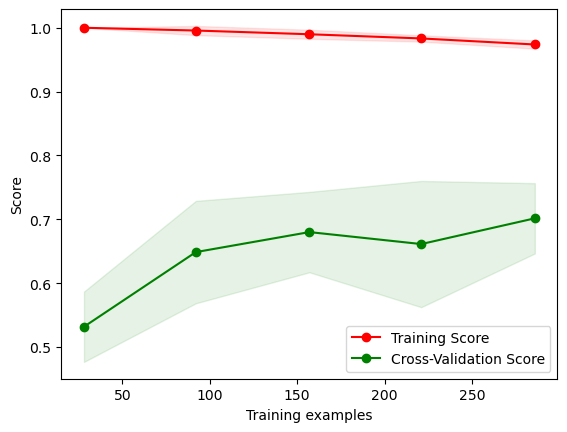

In [129]:
# Ensure the predictions have the same number of samples
min_samples_urban = min(len(svc_pred_urban), len(GBpred_urban), len(XGBpred_urban))
svm_predictions_urban = svc_pred_urban[:min_samples_urban]
xg_predictions_urban = GBpred_urban[:min_samples_urban]
xgb_predictions_urban = XGBpred_urban[:min_samples_urban]
y_test_urban = y_test_urban[:min_samples_urban]

ensemble_predictions_urban = []
for i in range(len(y_test_urban)):
    # Majority voting
    votes_urban = svc_pred_urban[i] + GBpred_urban[i] + XGBpred_urban[i]
    ensemble_predictions_urban.append(1 if votes_urban >= 2 else 0)

# calculating the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
cm_urban = confusion_matrix(y_test_urban, ensemble_predictions_urban)
# calculate sensitivity/recall
sensitivity_urban = recall_score(y_test_urban, ensemble_predictions_urban)

# calculate specificity
specificity_urban = cm_urban[0,0] / (cm_urban[0,0] + cm_urban[0,1])

# print the results
print("Sensitivity:", sensitivity_urban)
print("Specificity:", specificity_urban)

# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes_urban, train_scores_urban, test_scores_urban = learning_curve(ensemble_model_urban, x_train_urban, y_train_urban, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean_urban = np.mean(train_scores_urban, axis=1)
train_scores_std_urban = np.std(train_scores_urban, axis=1)
test_scores_mean_urban = np.mean(test_scores_urban, axis=1)
test_scores_std_urban = np.std(test_scores_urban, axis=1)

# Plot the learning curve
plt.plot(train_sizes_urban, train_scores_mean_urban, 'o-', color="r", label="Training Score")
plt.plot(train_sizes_urban, test_scores_mean_urban, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes_urban, train_scores_mean_urban - train_scores_std_urban, train_scores_mean_urban + train_scores_std_urban, alpha=0.1, color="r")
plt.fill_between(train_sizes_urban, test_scores_mean_urban - test_scores_std_urban, test_scores_mean_urban + test_scores_std_urban, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()



Sensitivity: 0.6630434782608695
Specificity: 0.7263157894736842


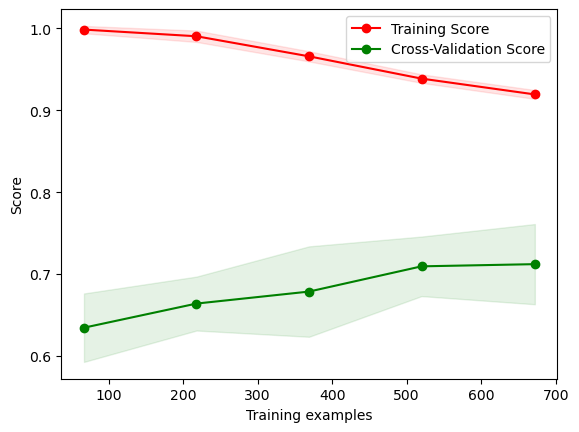

In [130]:
# Ensure the predictions have the same number of samples
min_samples_rural = min(len(svc_pred_rural), len(GBpred_rural), len(XGBpred_rural))
svm_predictions_rural = svc_pred_rural[:min_samples_rural]
xg_predictions_rural = GBpred_rural[:min_samples_rural]
xgb_predictions_rural = XGBpred_rural[:min_samples_rural]
y_test_rural = y_test_rural[:min_samples_rural]

ensemble_predictions_rural = []
for i in range(len(y_test_rural)):
    # Majority voting
    votes_rural = svc_pred_rural[i] + GBpred_rural[i] + XGBpred_rural[i]
    ensemble_predictions_rural.append(1 if votes_rural >= 2 else 0)

# calculating the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
cm_rural = confusion_matrix(y_test_rural, ensemble_predictions_rural)
# calculate sensitivity/recall
sensitivity_rural = recall_score(y_test_rural, ensemble_predictions_rural)

# calculate specificity
specificity_rural = cm_rural[0,0] / (cm_rural[0,0] + cm_rural[0,1])

# print the results
print("Sensitivity:", sensitivity_rural)
print("Specificity:", specificity_rural)

# Use learning_curve to generate the training and test accuracy scores
from sklearn.model_selection import learning_curve, train_test_split
train_sizes_rural, train_scores_rural, test_scores_rural = learning_curve(ensemble_model_rural, x_train_rural, y_train_rural, cv=10)

# Calculate the mean and standard deviation of the training and test accuracy scores
train_scores_mean_rural = np.mean(train_scores_rural, axis=1)
train_scores_std_rural = np.std(train_scores_rural, axis=1)
test_scores_mean_rural = np.mean(test_scores_rural, axis=1)
test_scores_std_rural = np.std(test_scores_rural, axis=1)

# Plot the learning curve
plt.plot(train_sizes_rural, train_scores_mean_rural, 'o-', color="r", label="Training Score")
plt.plot(train_sizes_rural, test_scores_mean_rural, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes_rural, train_scores_mean_rural - train_scores_std_rural, train_scores_mean_rural + train_scores_std_rural, alpha=0.1, color="r")
plt.fill_between(train_sizes_rural, test_scores_mean_rural - test_scores_std_rural, test_scores_mean_rural + test_scores_std_rural, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


# Feature Inportance

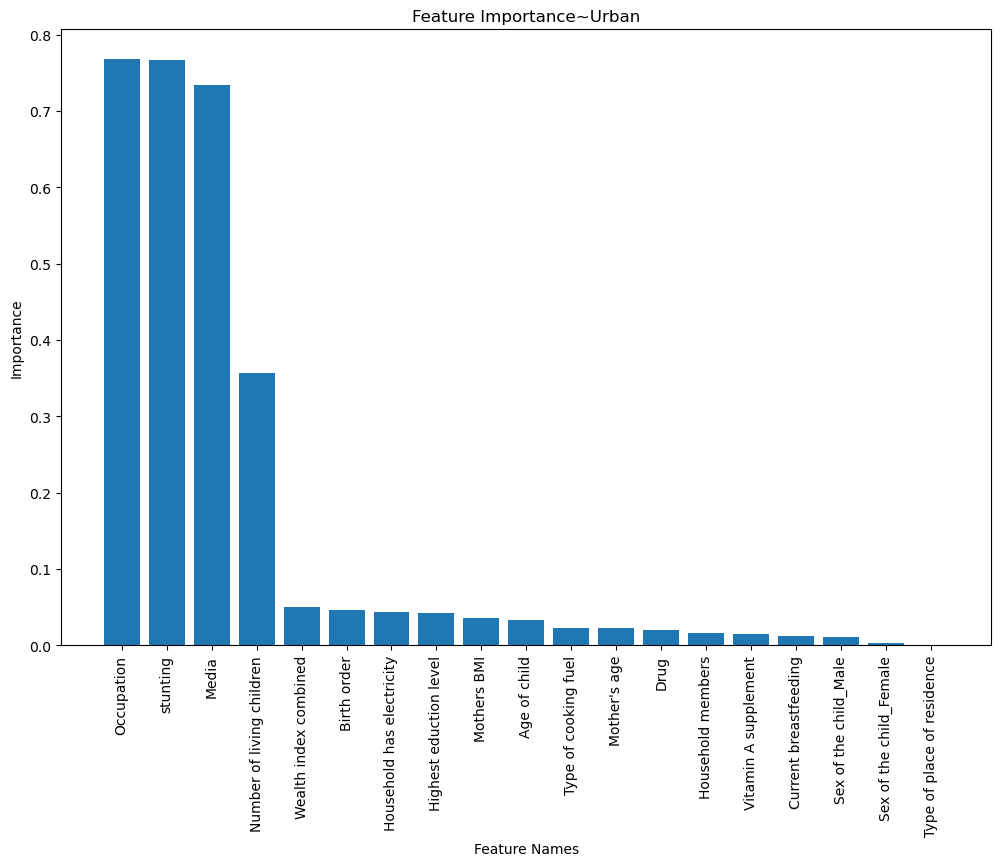

In [131]:
# Create a list of feature names
feature_names_urban = X_urban.columns

# Extract feature importances from the base classifiers
svm_feature_importances_urban = np.abs(svc_tuned_urban.coef_[0])
gb_feature_importances_urban = gb_tuned_urban.feature_importances_
xgb_feature_importances_urban = xgb_tuned_urban.feature_importances_

# Calculate average feature importance across the Gradient Boosting and XGBoost classifiers
ensemble_feature_importances_urban = (gb_feature_importances_urban + xgb_feature_importances_urban + svm_feature_importances_urban) / 3

# Sort feature importances in descending order
sorted_indices_urban = np.argsort(ensemble_feature_importances_urban)[::-1]
sorted_importances_urban = ensemble_feature_importances_urban[sorted_indices_urban]
sorted_features_urban = feature_names_urban[sorted_indices_urban]  # Get the sorted feature names

feature_importances_urban = pd.DataFrame(ensemble_feature_importances_urban, index=feature_names_urban)
feature_importances_urban.head()

features_urban = list(feature_importances_urban[feature_importances_urban[0] > 0].index)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_features_urban, sorted_importances_urban, align='center')
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.title('Feature Importance~Urban')
plt.show()


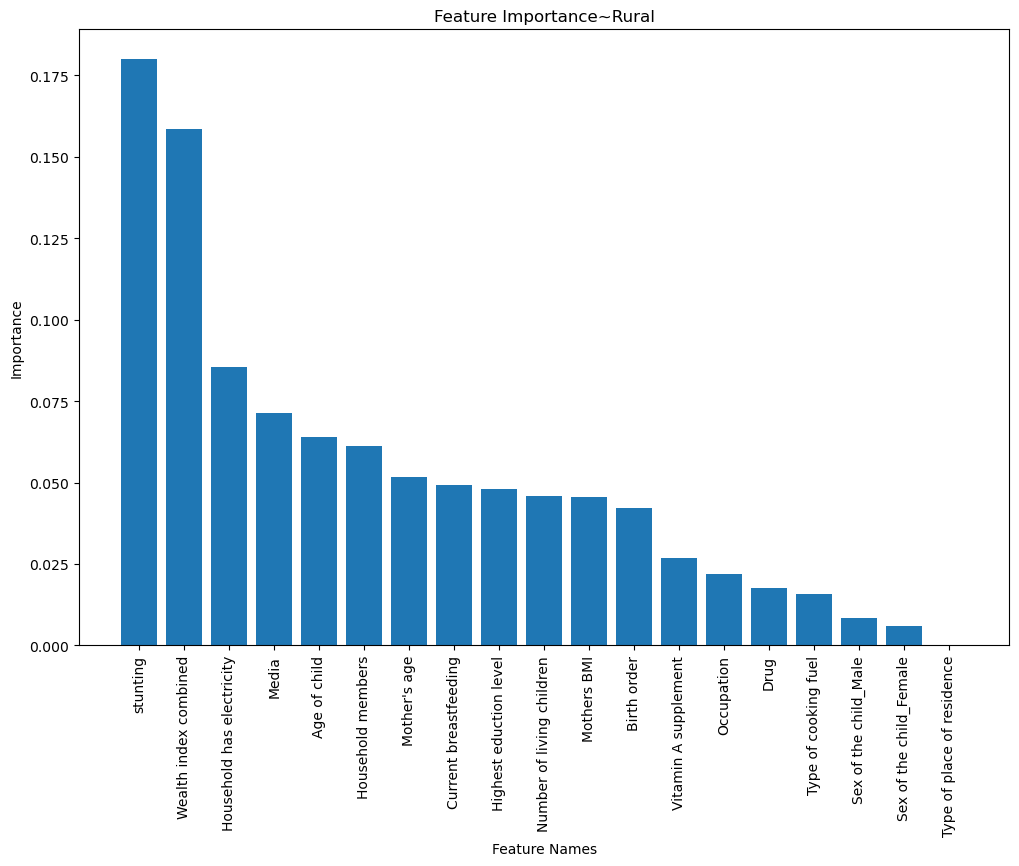

In [132]:
# Extract feature importances from the base classifiers
# SVM will be skipped because it uses a non-linear kernel
gb_feature_importances_rural = gb_tuned_rural.feature_importances_
xgb_feature_importances_rural = xgb_tuned_rural.feature_importances_

# Calculate average feature importance across the Gradient Boosting and XGBoost classifiers
ensemble_feature_importances_rural = (gb_feature_importances_rural + xgb_feature_importances_rural) / 2

# Sort feature importances in descending order
sorted_indices_rural = np.argsort(ensemble_feature_importances_rural)[::-1]
sorted_importances_rural = ensemble_feature_importances_rural[sorted_indices_rural]

# Create a list of feature names
feature_names_rural = X_rural.columns
sorted_features_rural = feature_names_rural[sorted_indices_rural]  # Get the sorted feature names

feature_importances_rural = pd.DataFrame(ensemble_feature_importances_rural, index=feature_names_rural)
feature_importances_rural.head()

features_rural = list(feature_importances_rural[feature_importances_rural[0] > 0].index)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_features_rural, sorted_importances_rural, align='center')
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.title('Feature Importance~Rural')
plt.show()


